In [74]:
import pandas as pd
from sklearn.model_selection import train_test_split
import joblib
import numpy as np
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif
import seaborn as sns
import matplotlib.pyplot as plt

In [75]:
# Show all columns in the DataFrame
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [76]:
df = pd.read_csv('results/combined/Bagged_Ensemble_predictions.csv')

In [77]:
df.head()

,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow IAT Std,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Std,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,ACK Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Active Mean,Active Max,Active Min,Idle Mean,Idle Max,Idle Min,cm_label
0,0.0,2.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0000,0.000,0.0,0.00,0.000,0.0,0.0,0.000,0.0,64.0,0.000000,0.0,0.000000,0.000000,0.00000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,83.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,FN
1,0.0,2.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0000,0.000,0.0,0.00,0.000,0.0,0.0,0.000,0.0,64.0,0.000000,0.0,0.000000,0.000000,0.00000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,83.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TN
2,5.0,5.0,96.0,78.0,68.0,19.2,29.852974,50.0,15.6,22.733236,2401.1592,13199.983,66387.0,16596.75,18172.863,42054.0,2038.0,17943.898,160.0,176.0,68.998825,68.0,15.818182,24.371368,593.96360,0.0,1.0,0.0,1.0,17.4,19.2,15.6,5.0,96.0,5.0,78.0,85.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,TN
3,5.0,5.0,96.0,76.0,68.0,19.2,29.852974,48.0,15.2,21.981812,2457.7397,14548.211,64008.0,16002.00,20452.650,45699.0,2034.0,20057.855,160.0,176.0,71.445920,68.0,15.636364,24.096775,580.65454,0.0,1.0,0.0,1.0,17.2,19.2,15.2,5.0,96.0,5.0,76.0,85.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,TN
4,0.0,2.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0000,0.000,0.0,0.00,0.000,0.0,0.0,0.000,0.0,64.0,0.000000,0.0,0.000000,0.000000,0.00000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,83.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TN


In [78]:
# Tạo từ điển ánh xạ từ cm_label sang tên dễ hiểu hơn
label_mapping = {
    'TP': 'Phát hiện đúng MITM',
    'TN': 'Phát hiện đúng bình thường',
    'FP': 'Báo nhầm là MITM',
    'FN': 'Bỏ sót tấn công'
}

# Áp dụng thay thế
df['cm_label'] = df['cm_label'].replace(label_mapping)

In [79]:
label_counts = df['cm_label'].value_counts()
label_percent = df['cm_label'].value_counts(normalize=True) * 100
result = pd.DataFrame({'Count': label_counts, 'Percentage (%)': label_percent.round(2)})
print(result)

                            Count  Percentage (%)
cm_label                                         
Phát hiện đúng bình thường  24669           88.78
Bỏ sót tấn công              1586            5.71
Phát hiện đúng MITM          1531            5.51


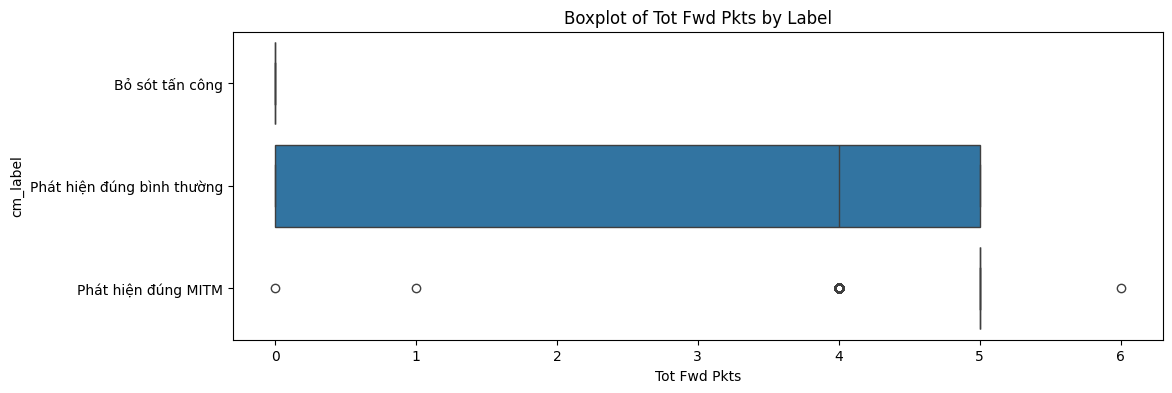

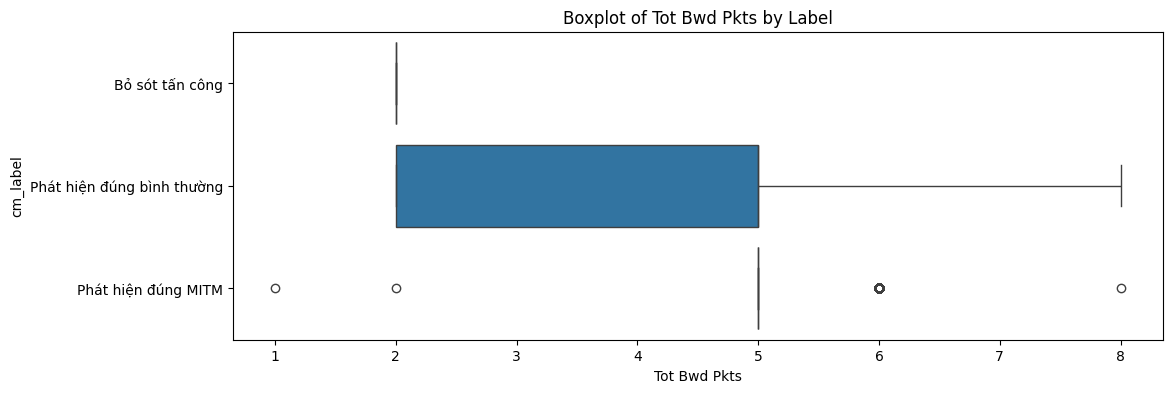

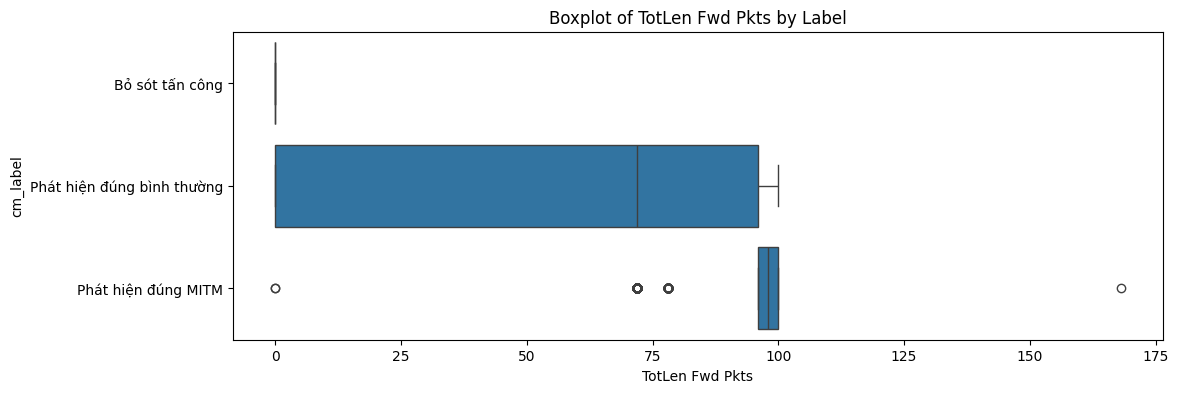

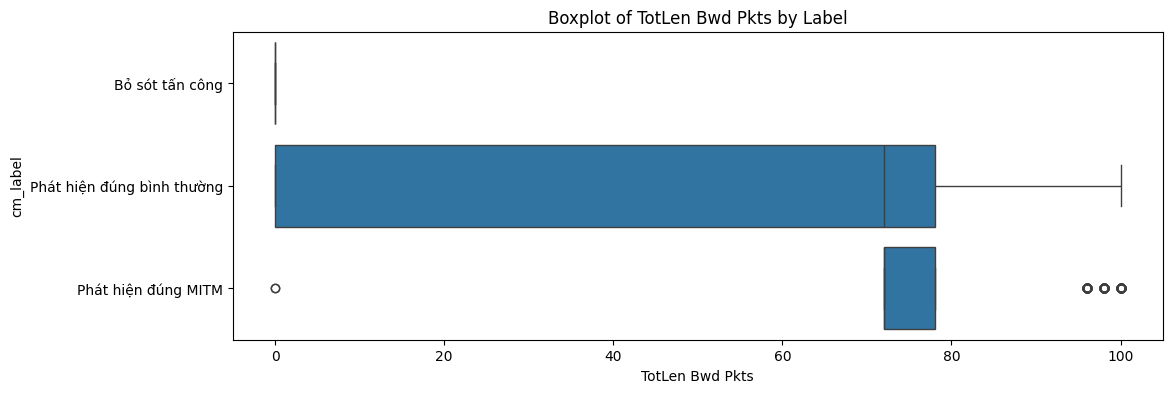

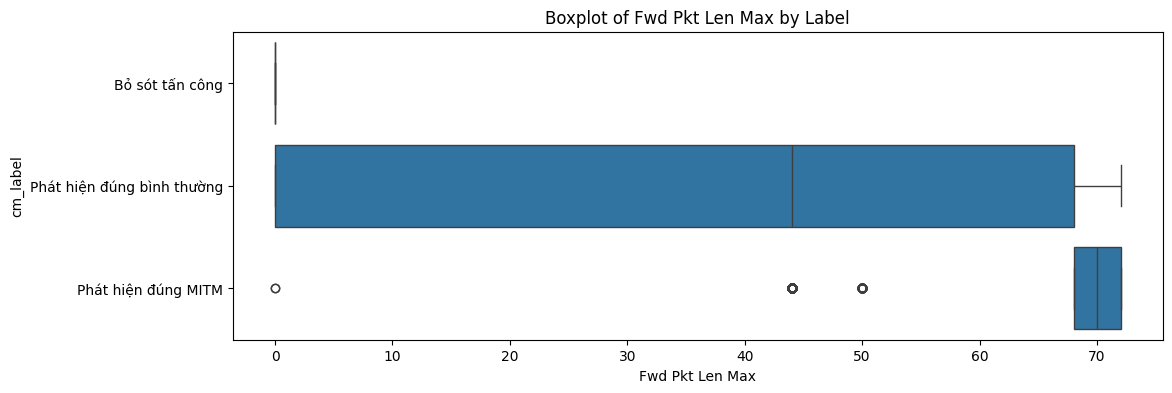

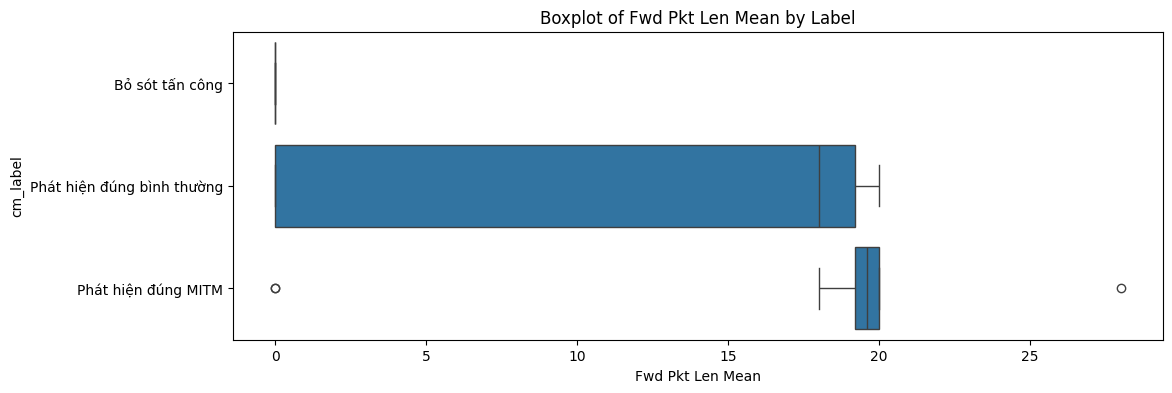

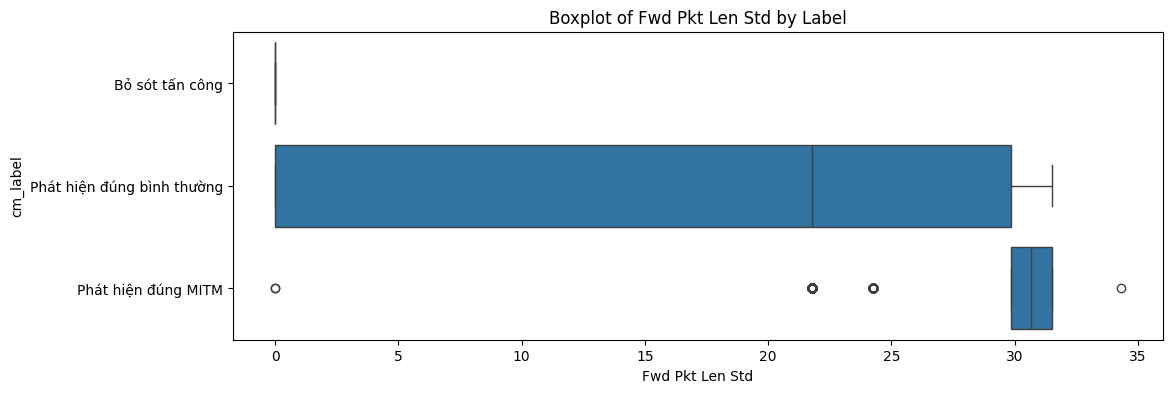

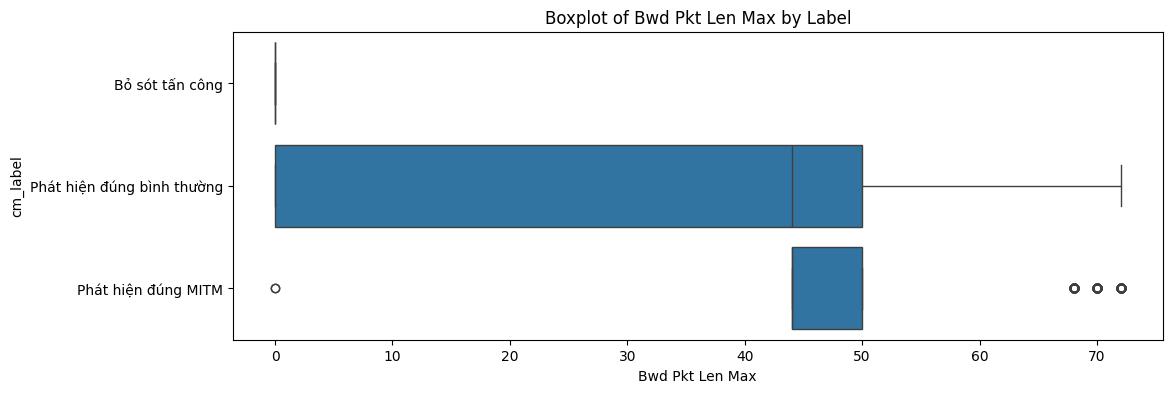

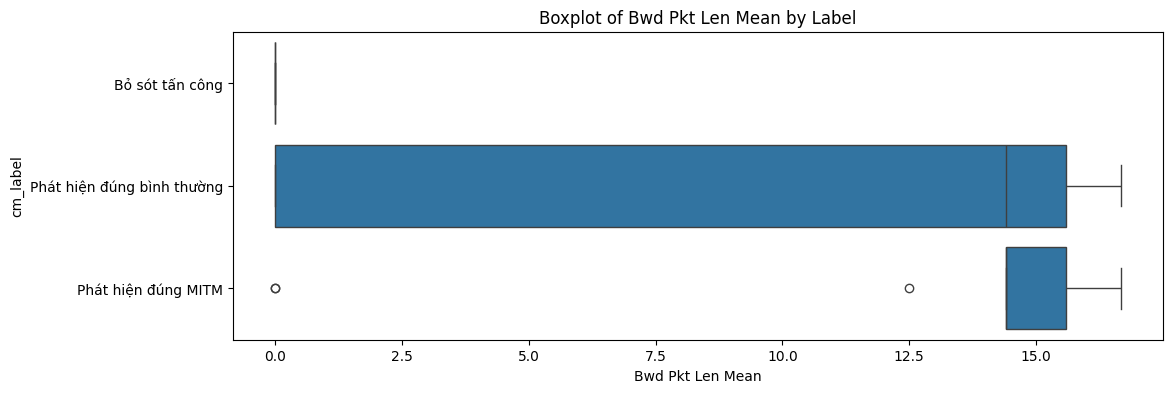

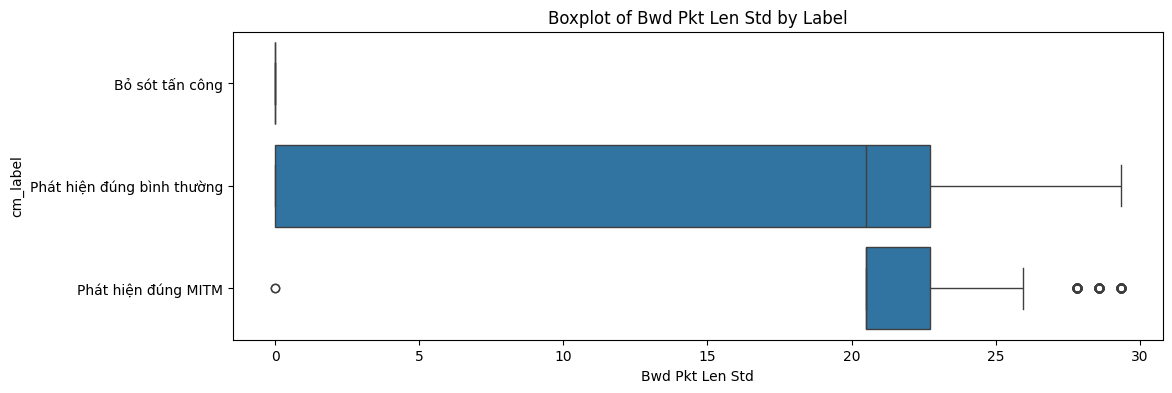

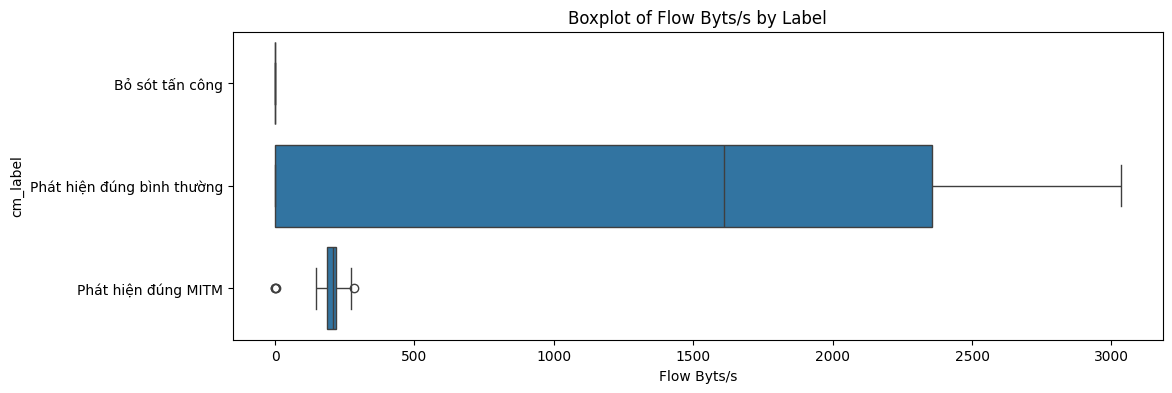

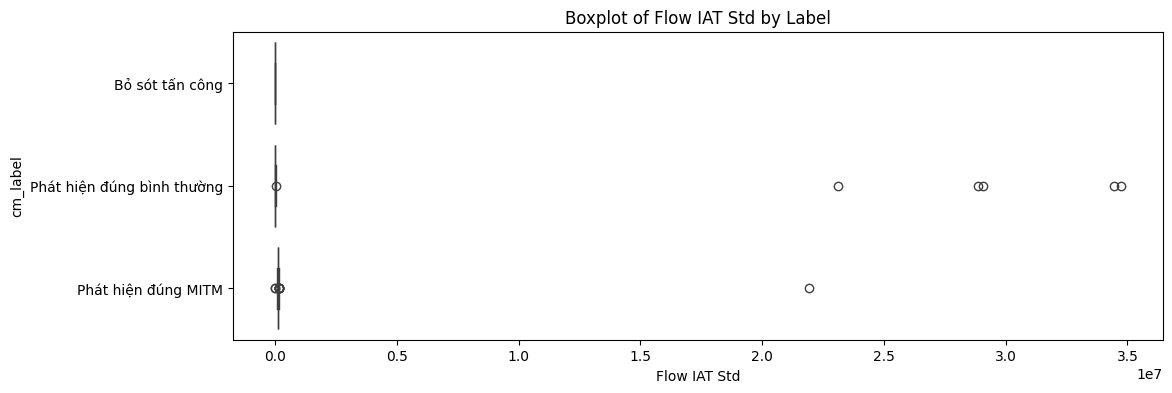

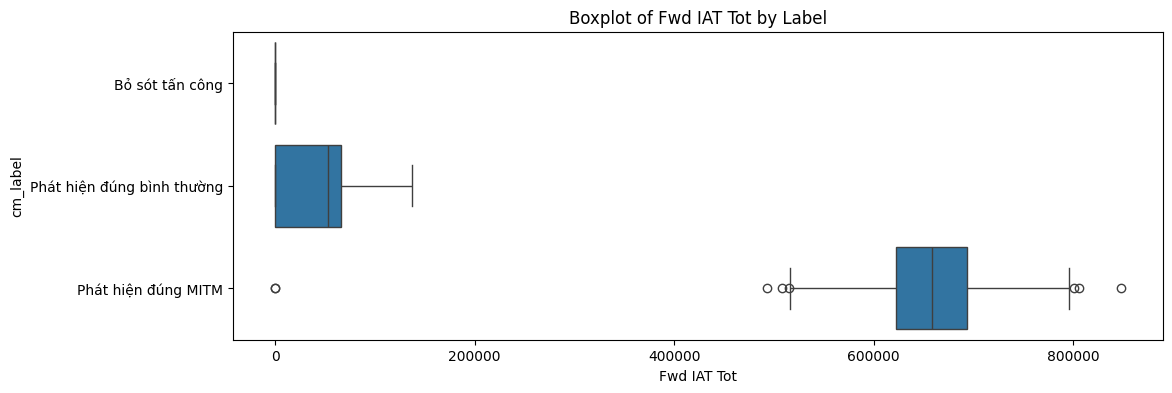

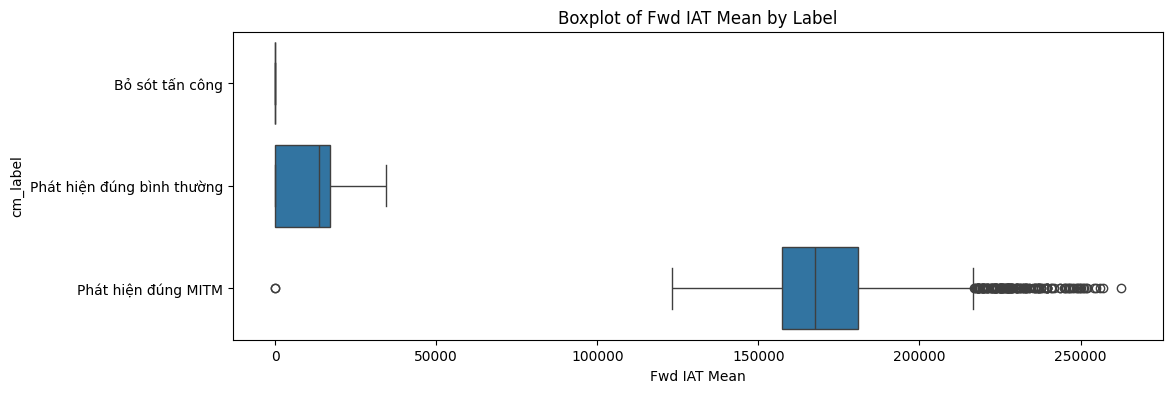

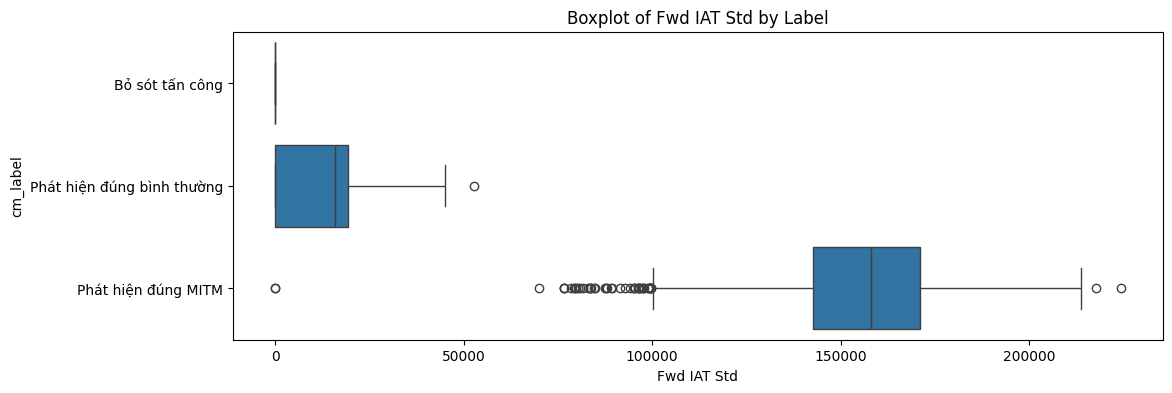

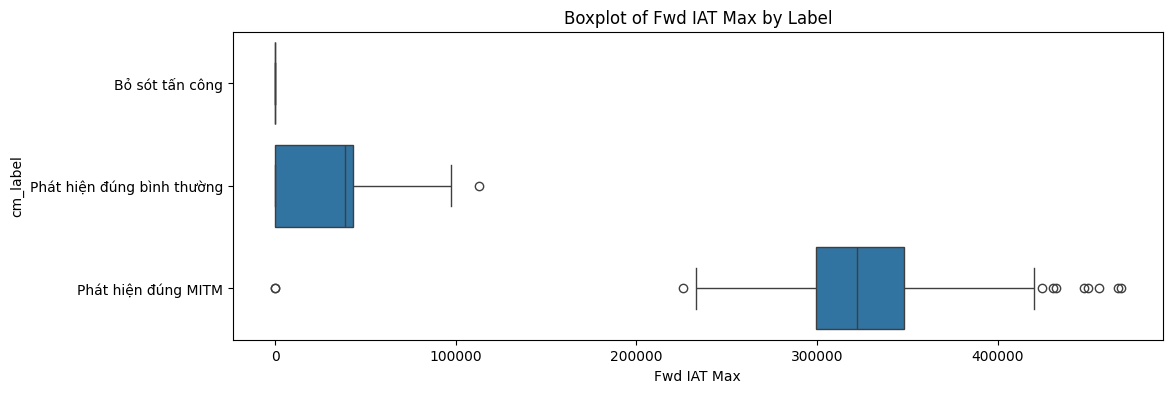

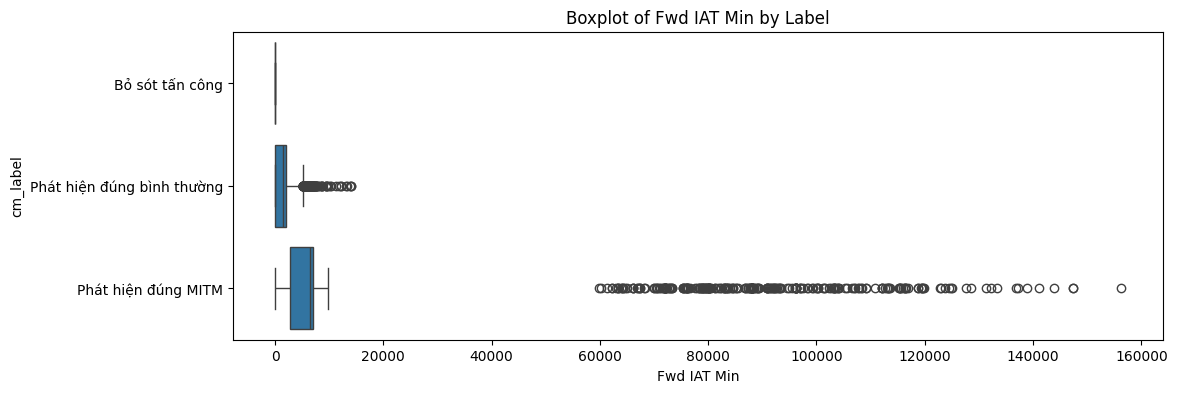

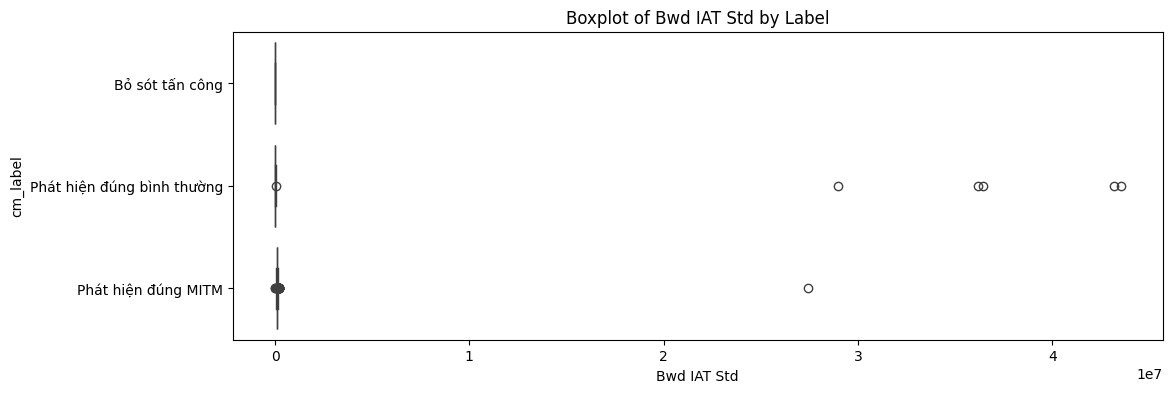

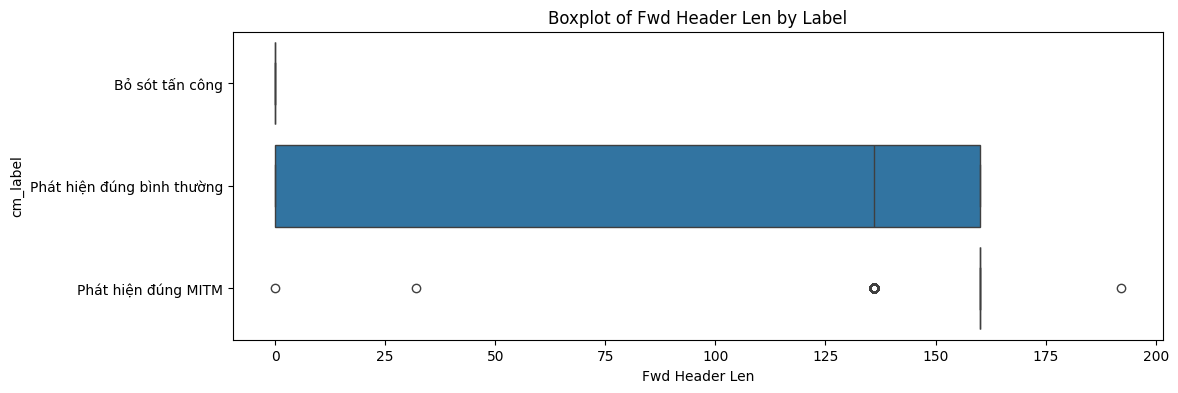

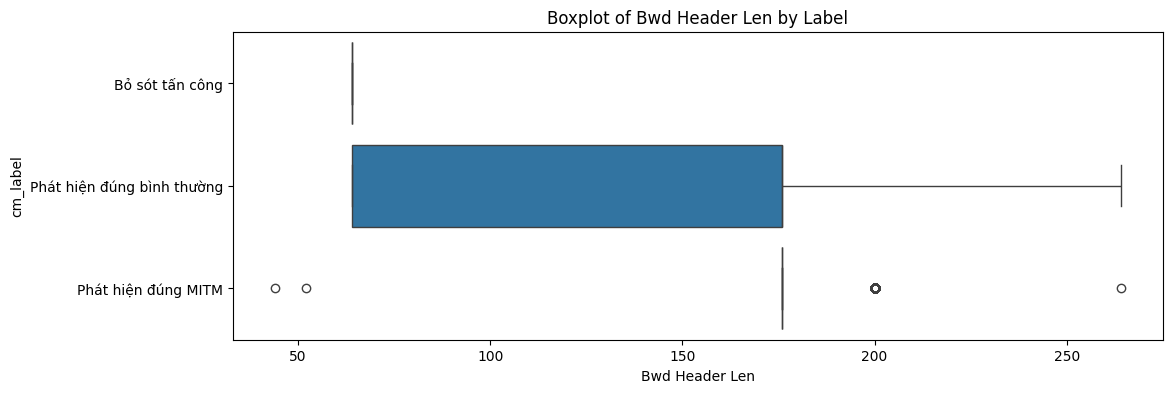

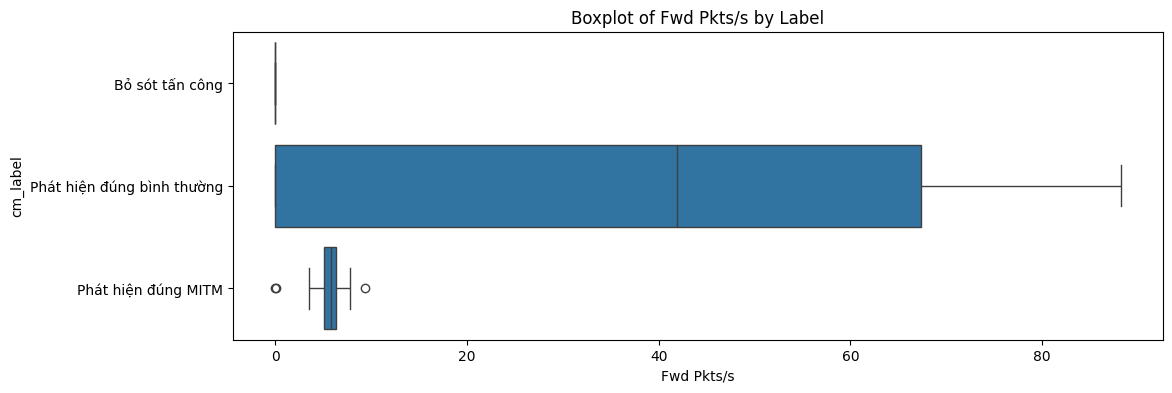

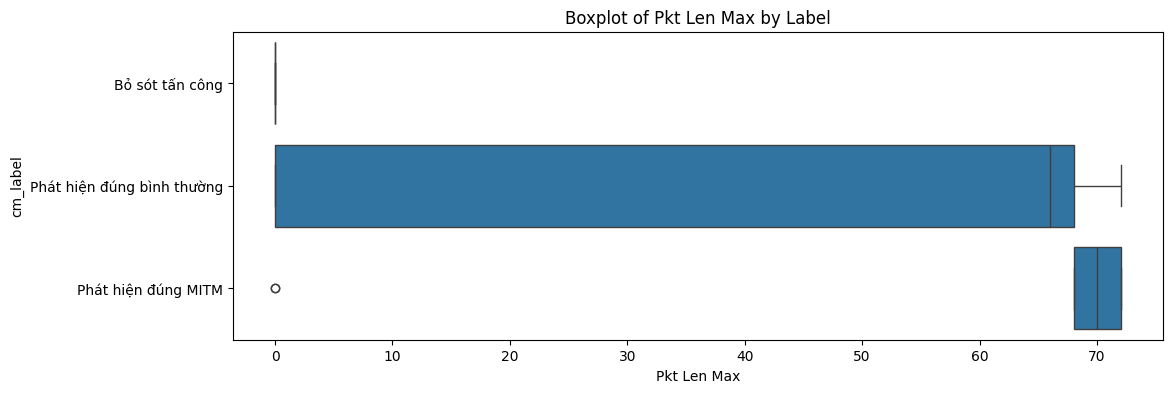

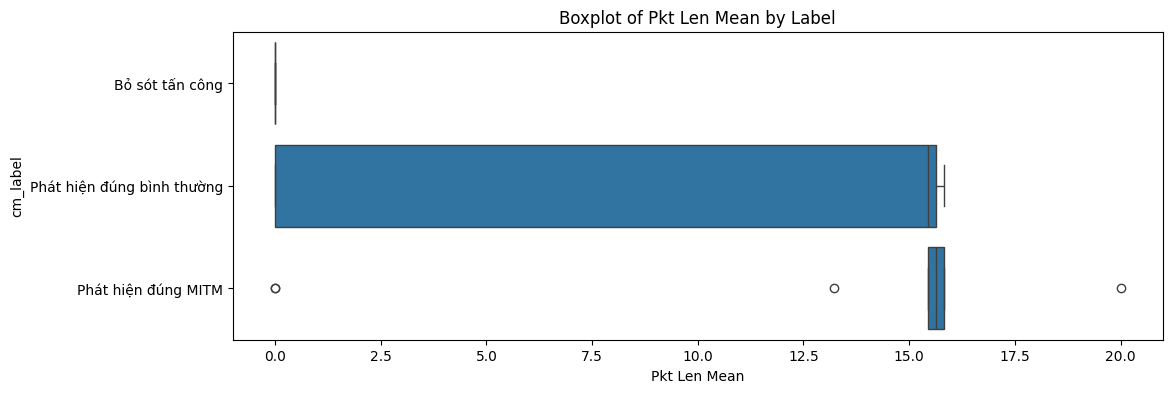

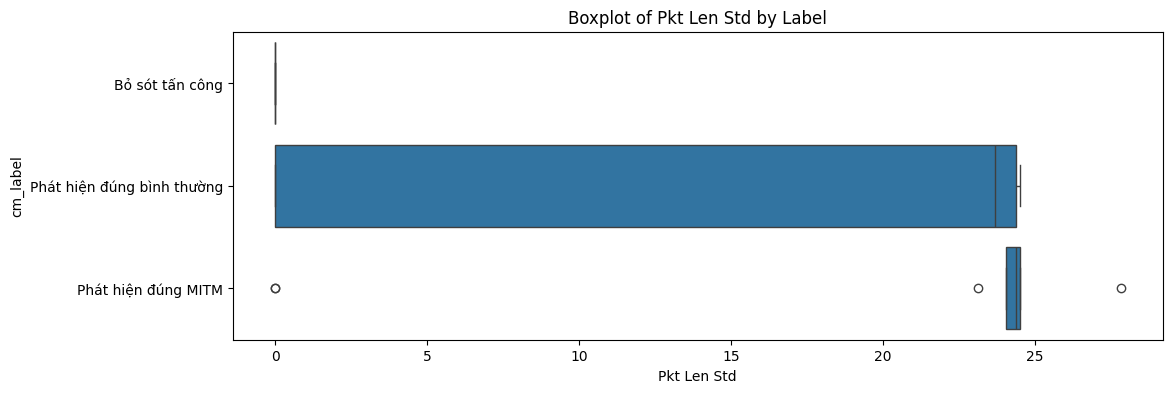

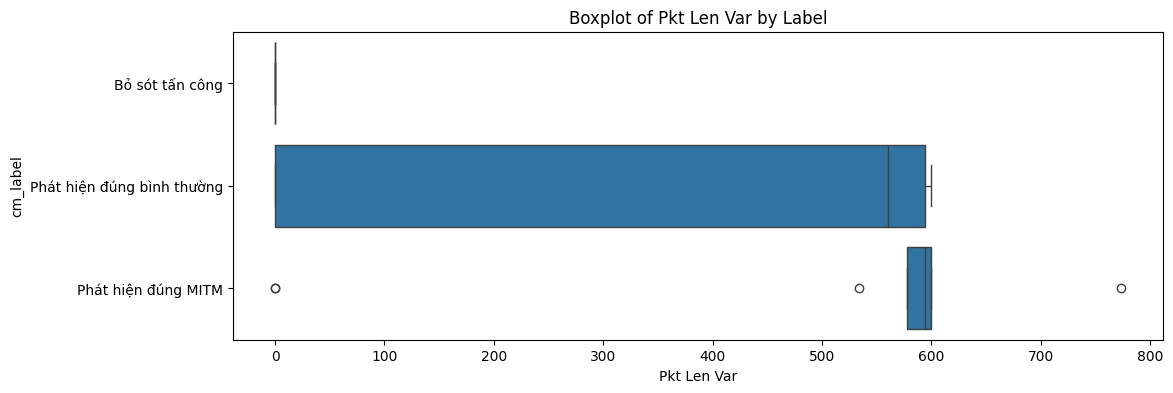

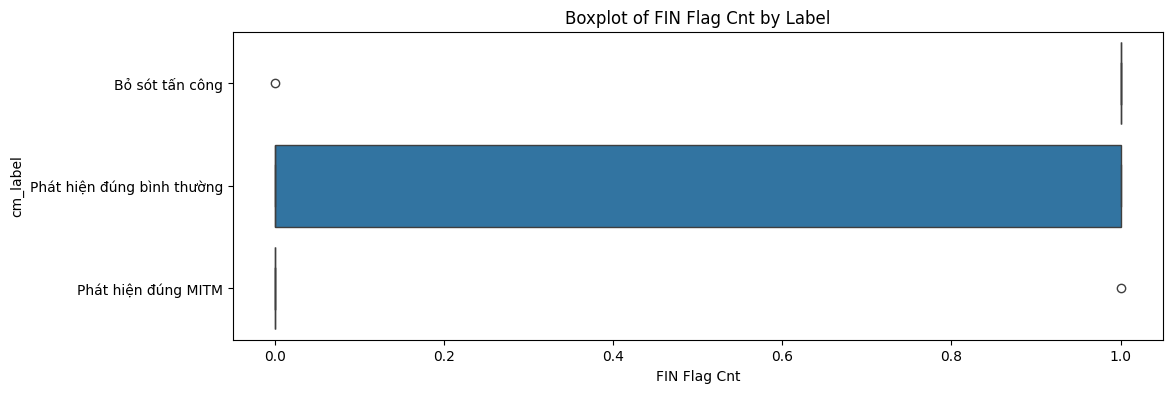

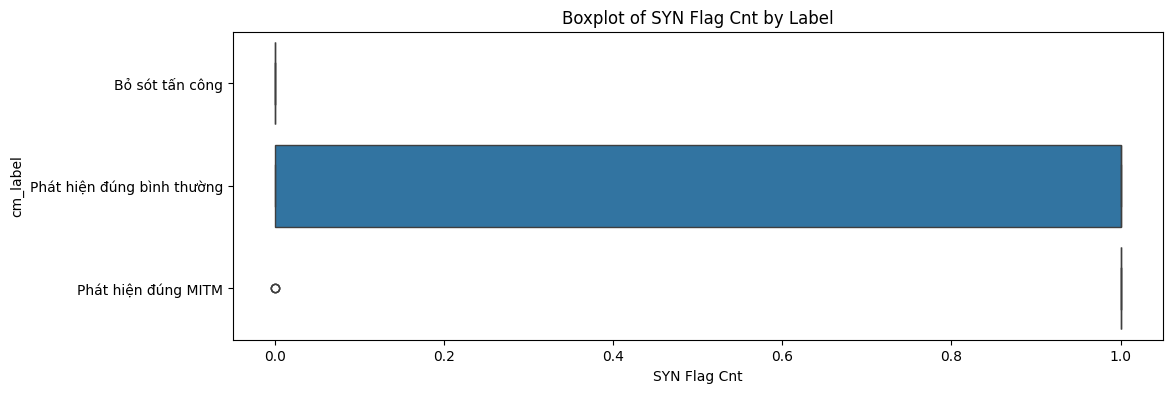

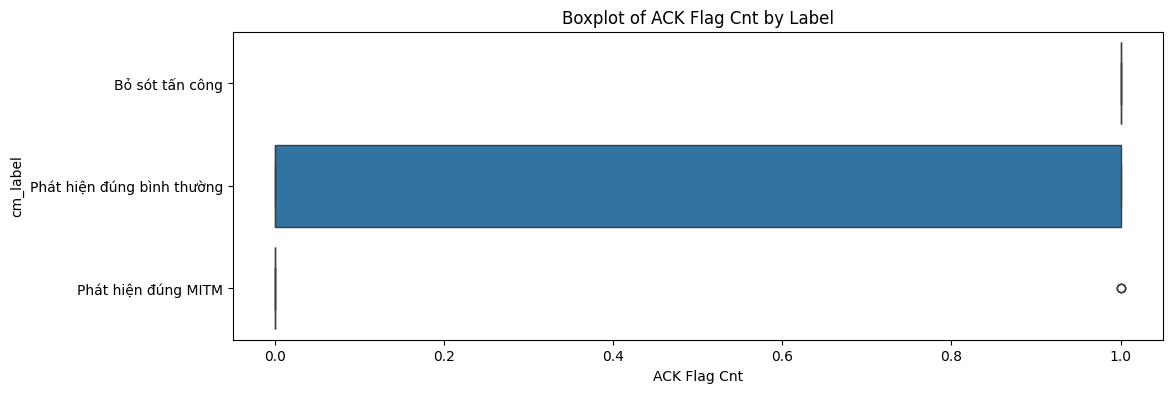

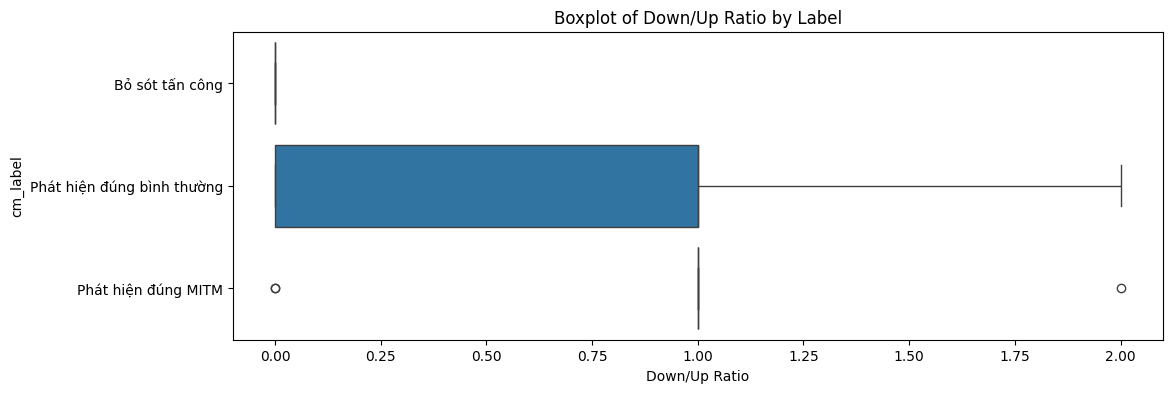

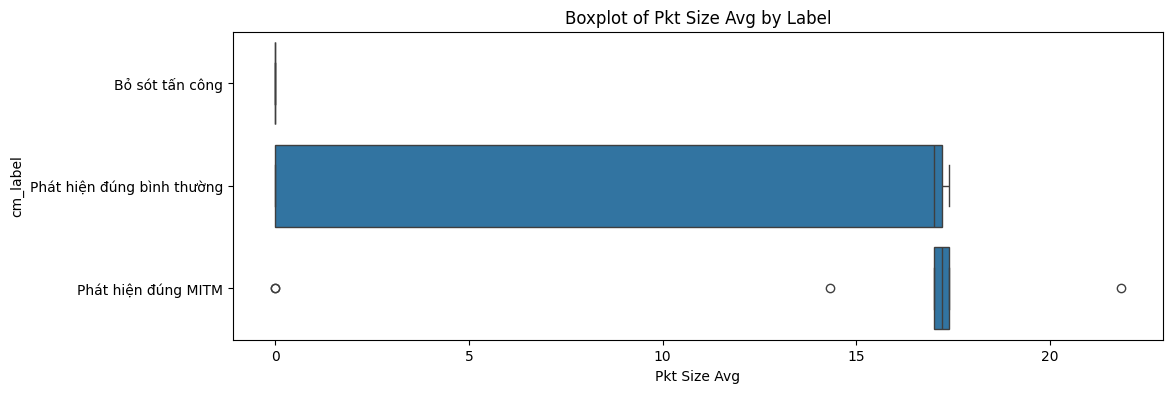

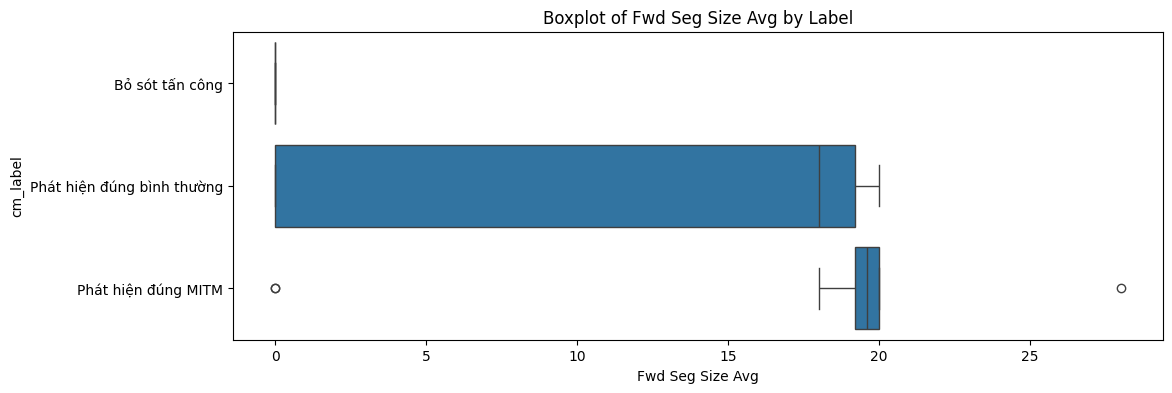

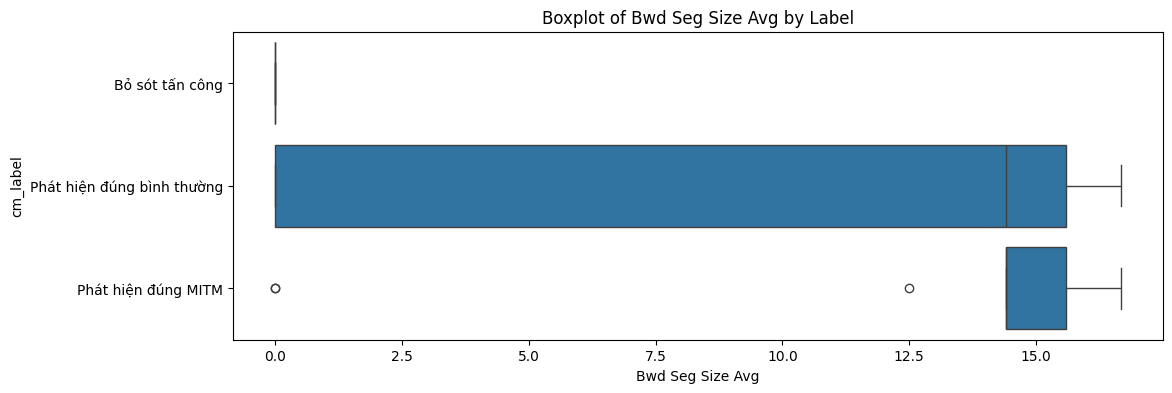

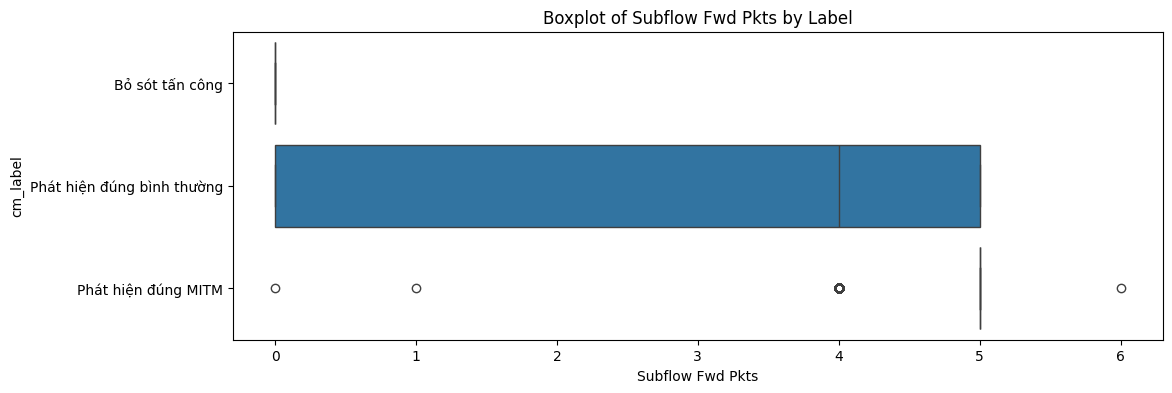

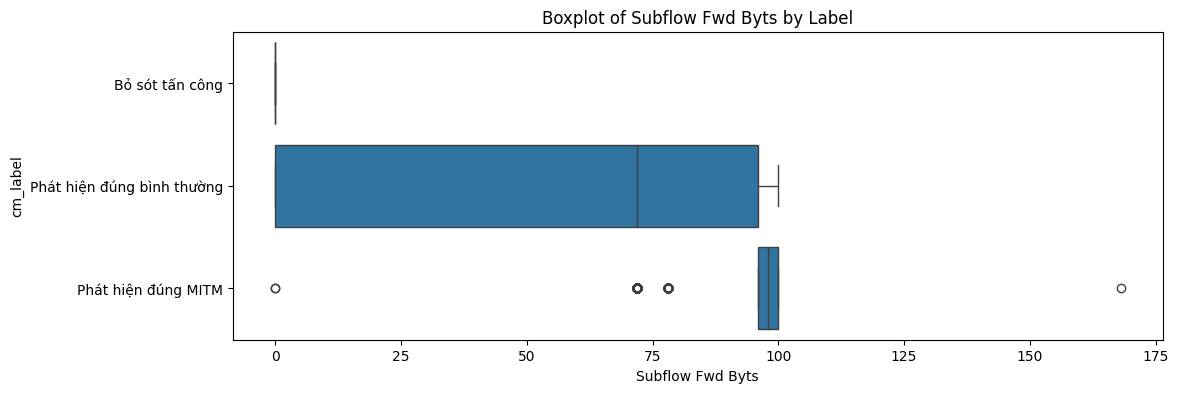

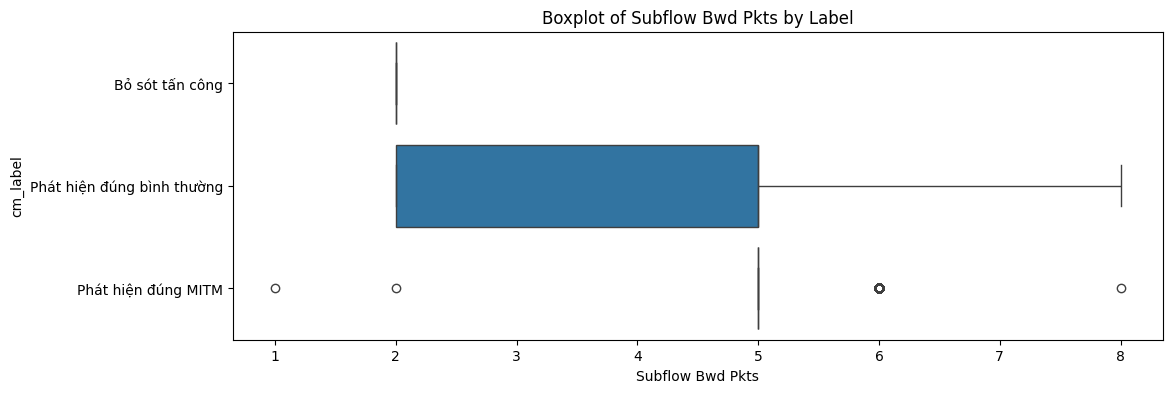

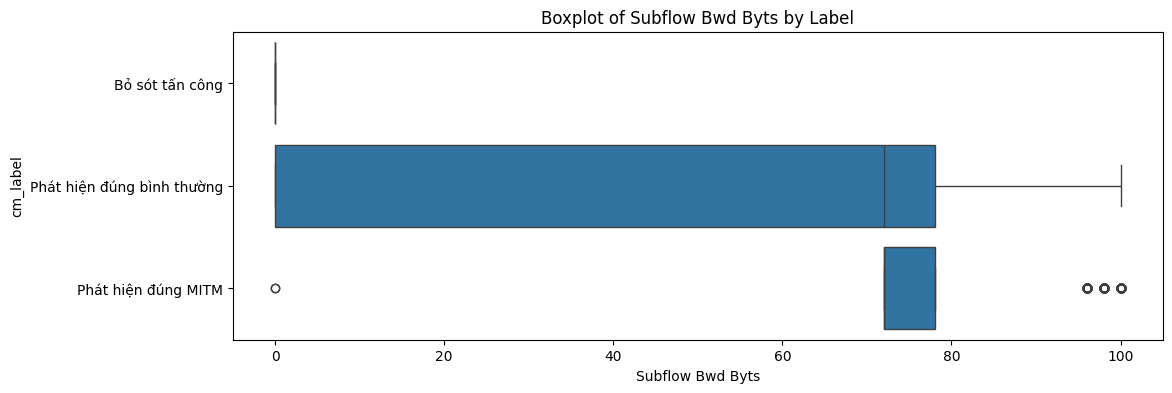

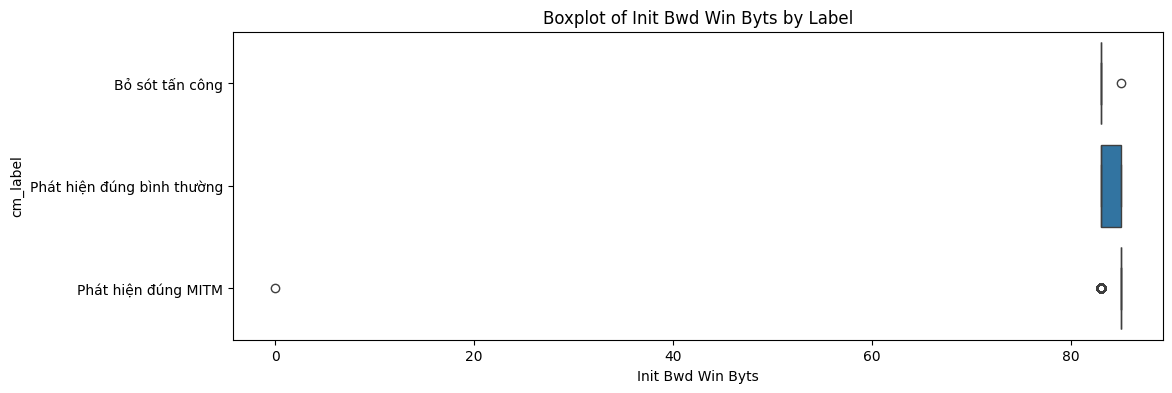

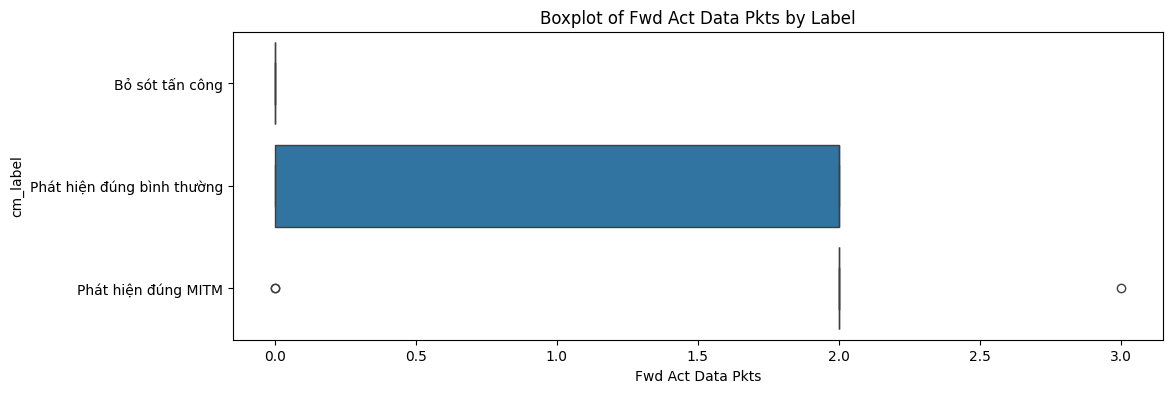

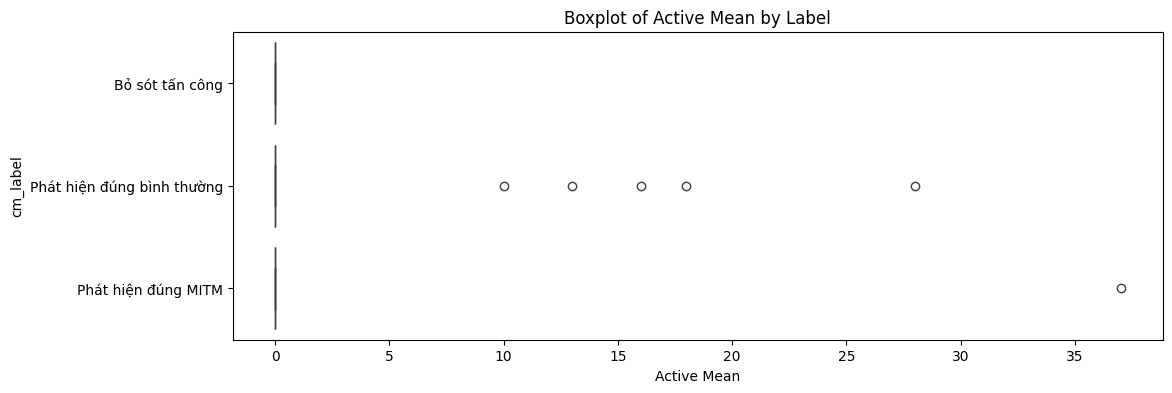

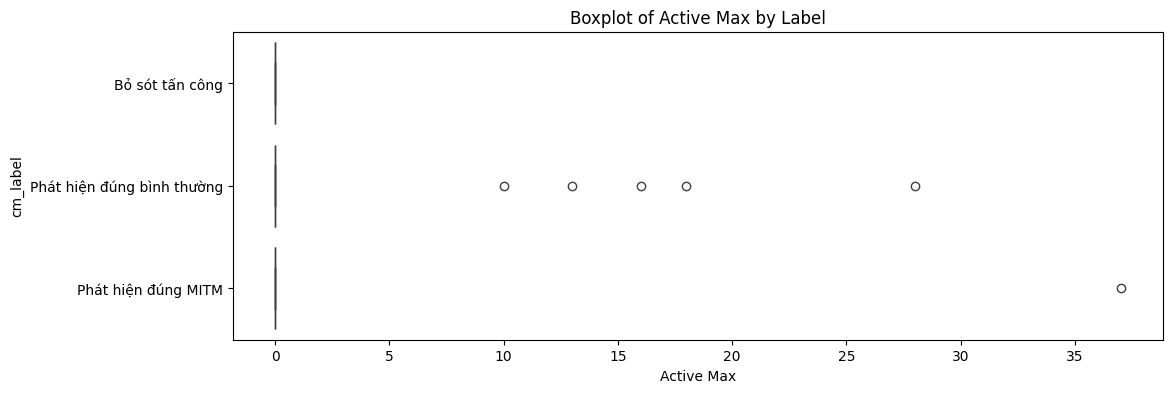

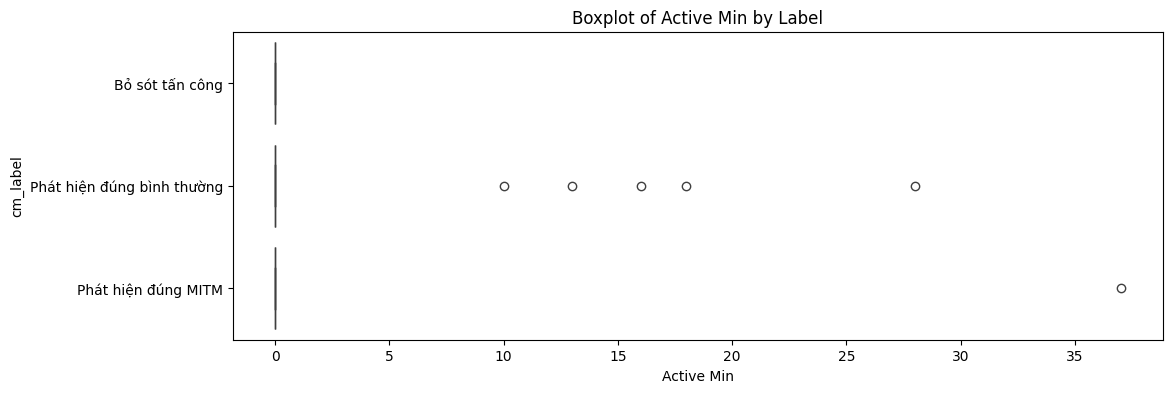

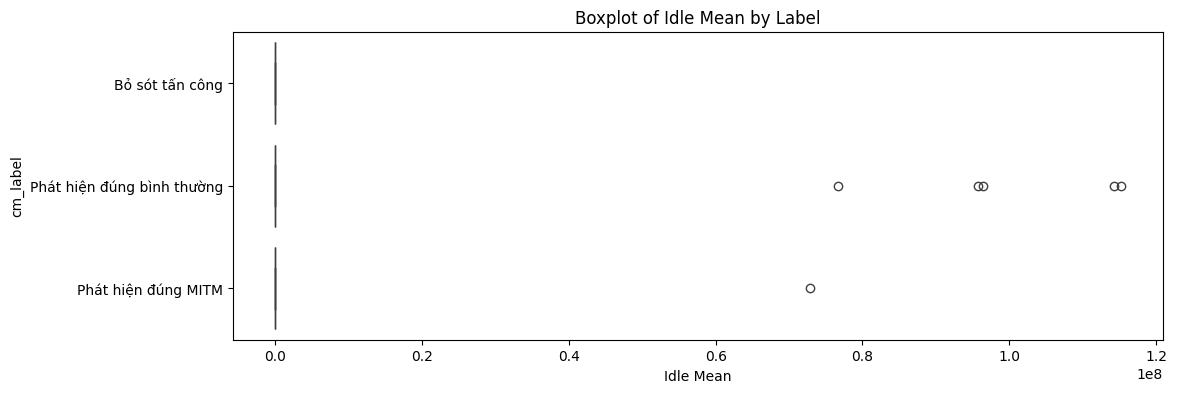

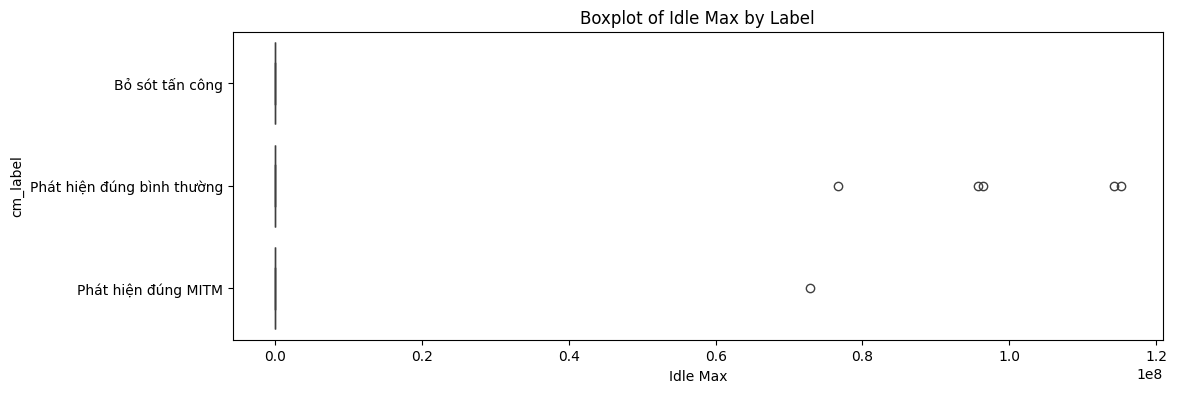

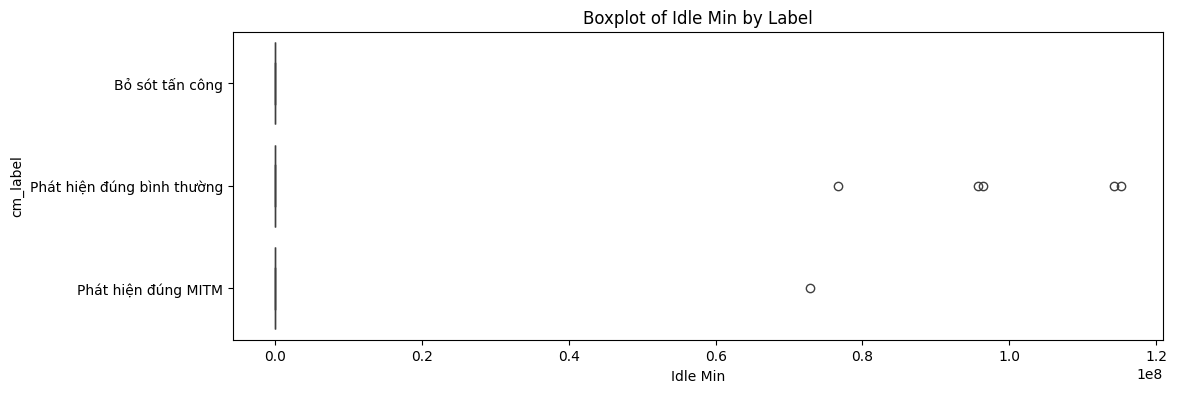

In [80]:


for col in df.select_dtypes(include='number').columns:
    plt.figure(figsize=(12, 4))
    sns.boxplot(y='cm_label', x=col, data=df)
    plt.title(f'Boxplot of {col} by Label')
    plt.show()

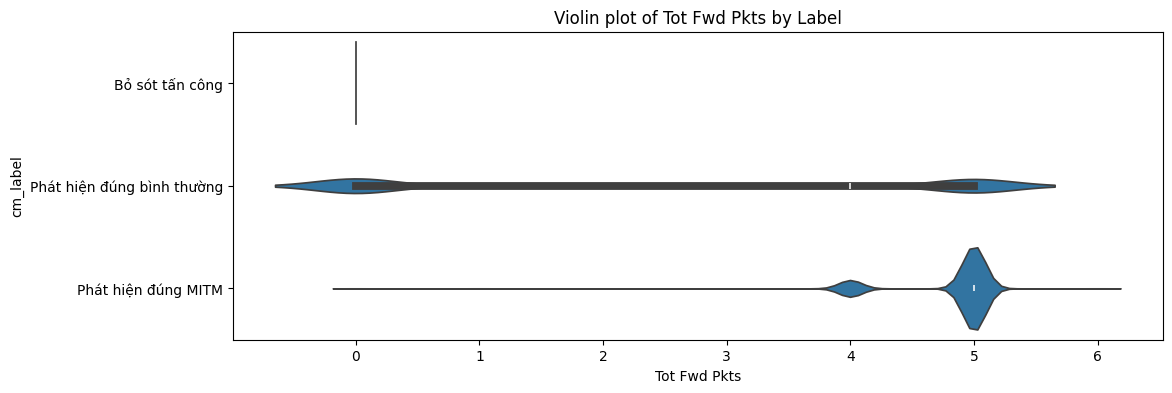

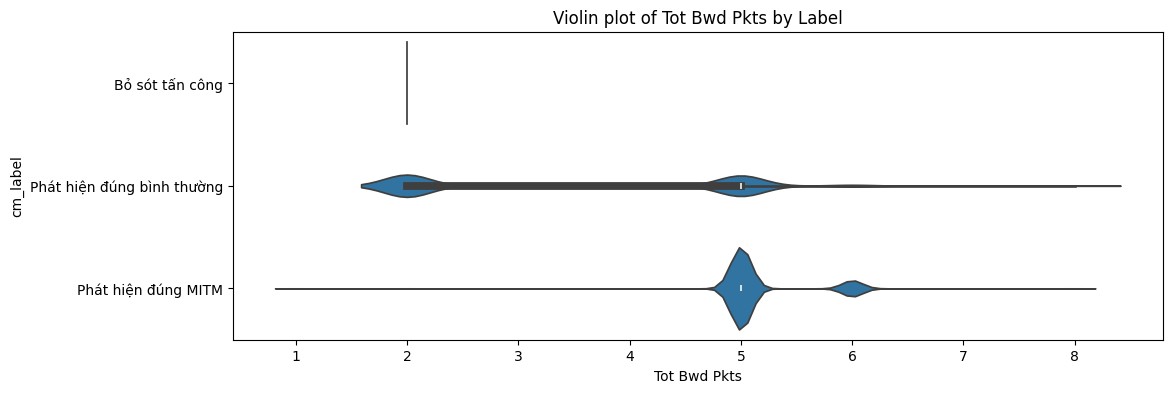

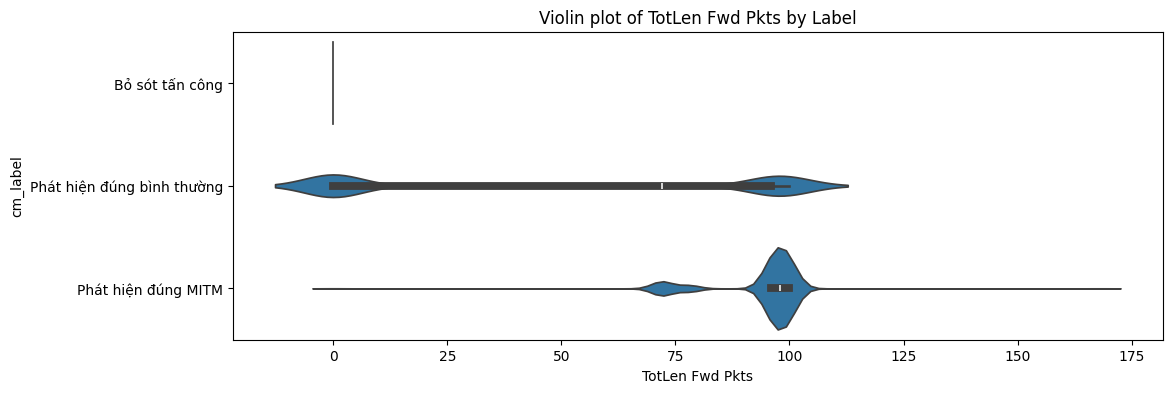

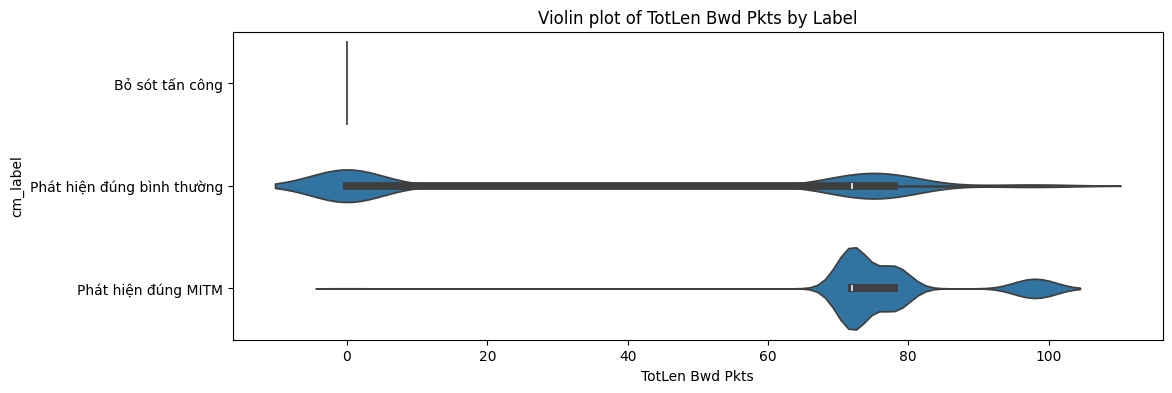

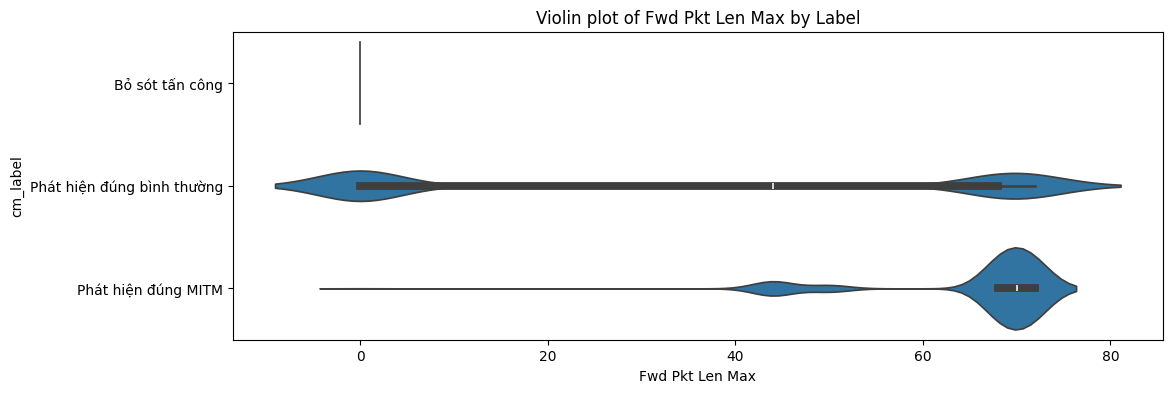

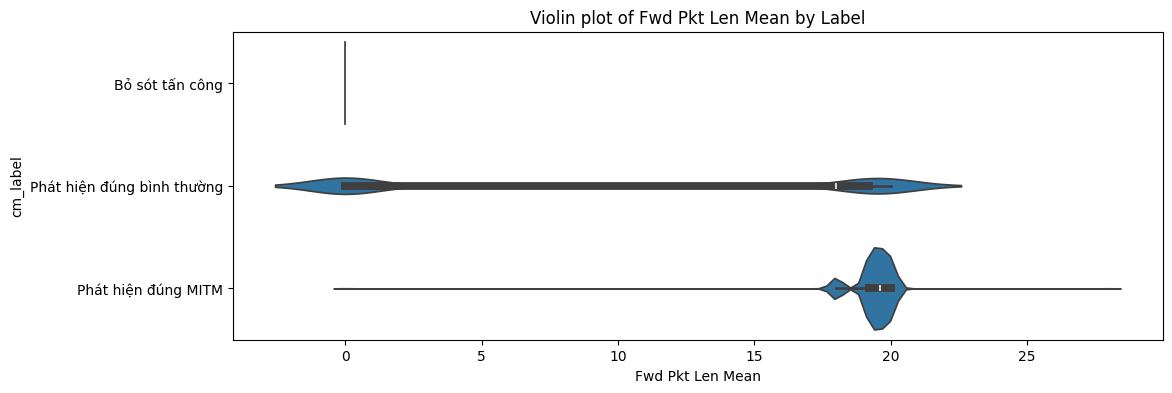

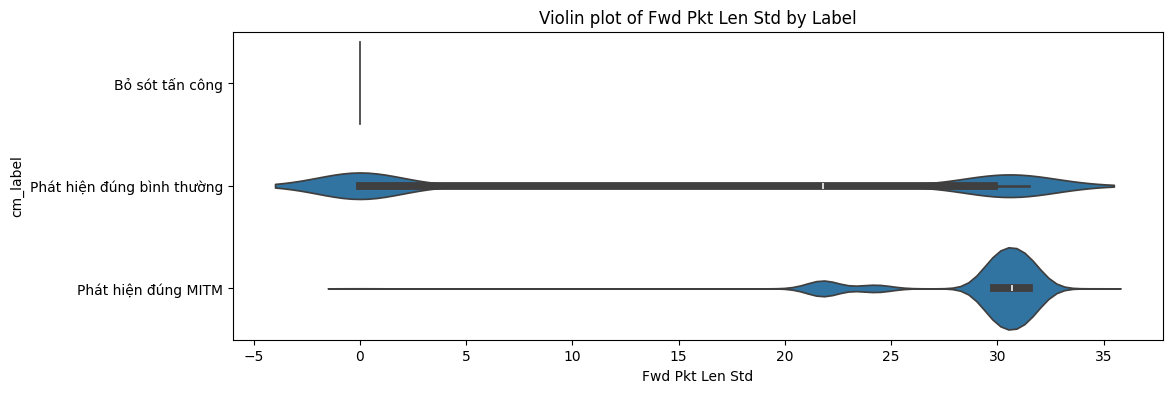

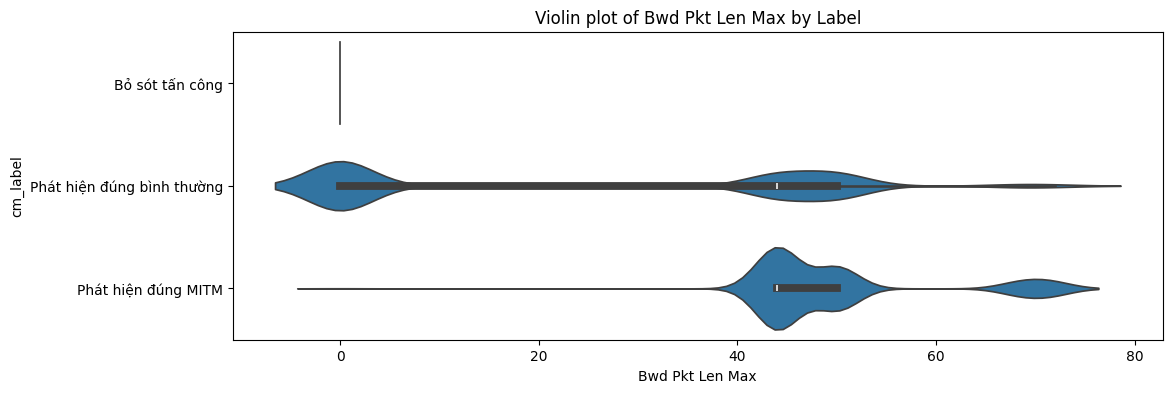

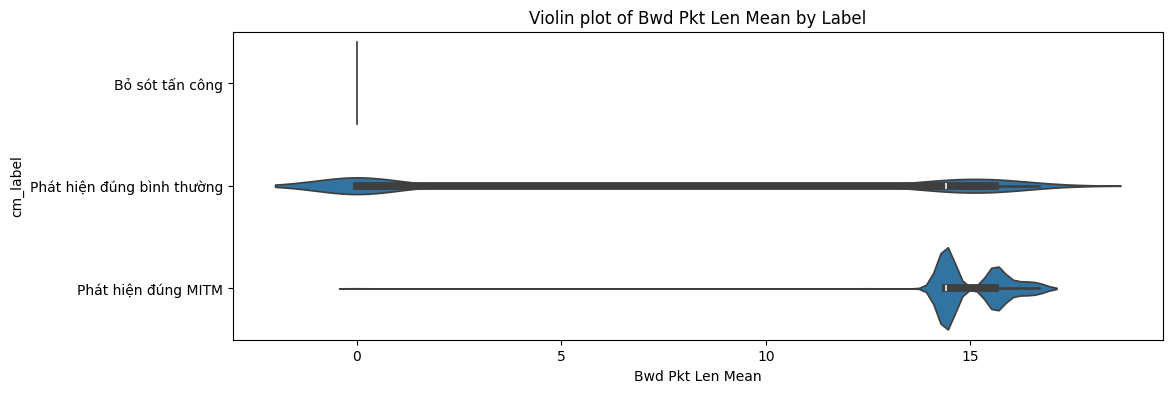

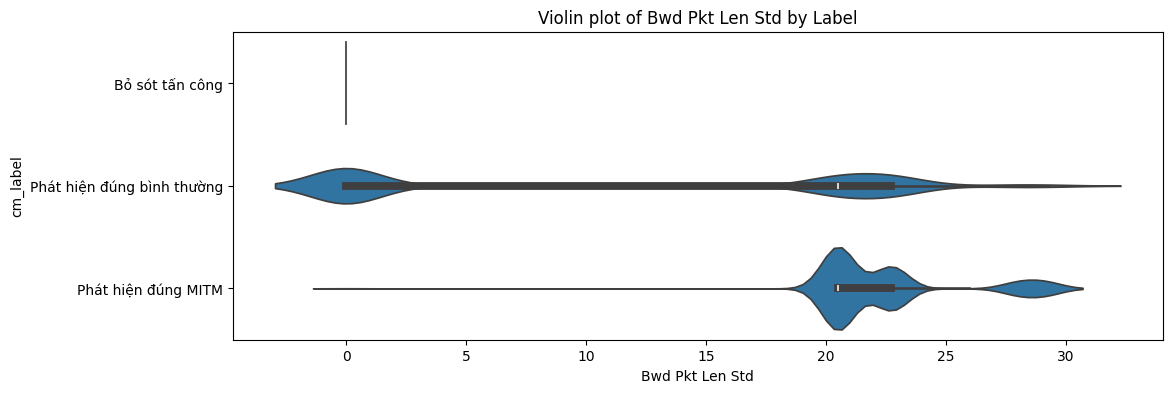

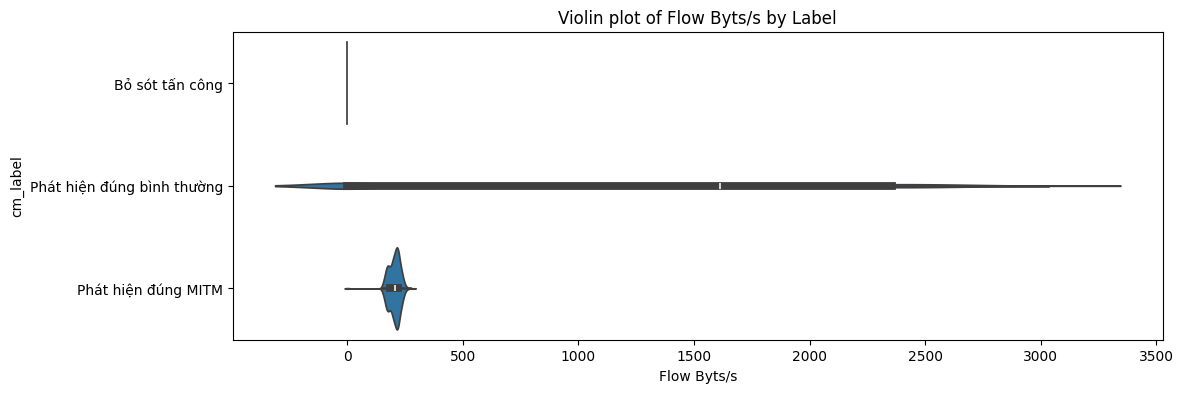

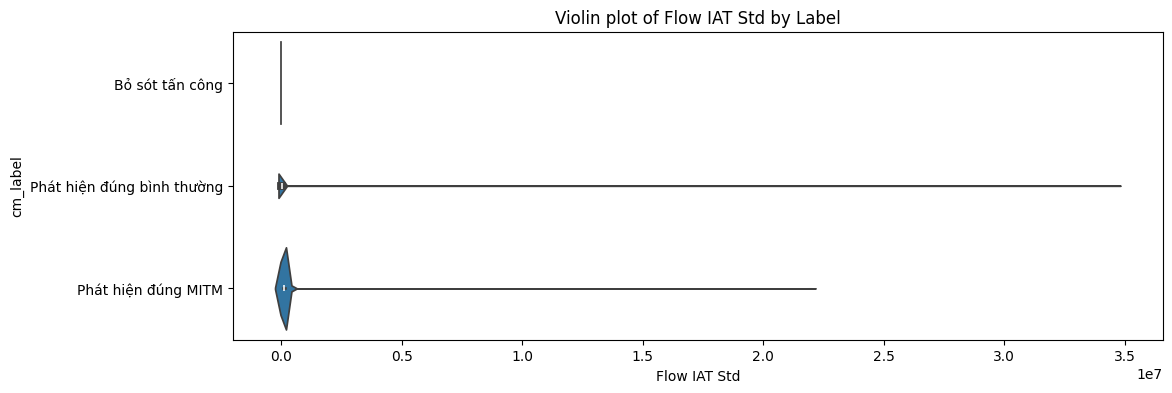

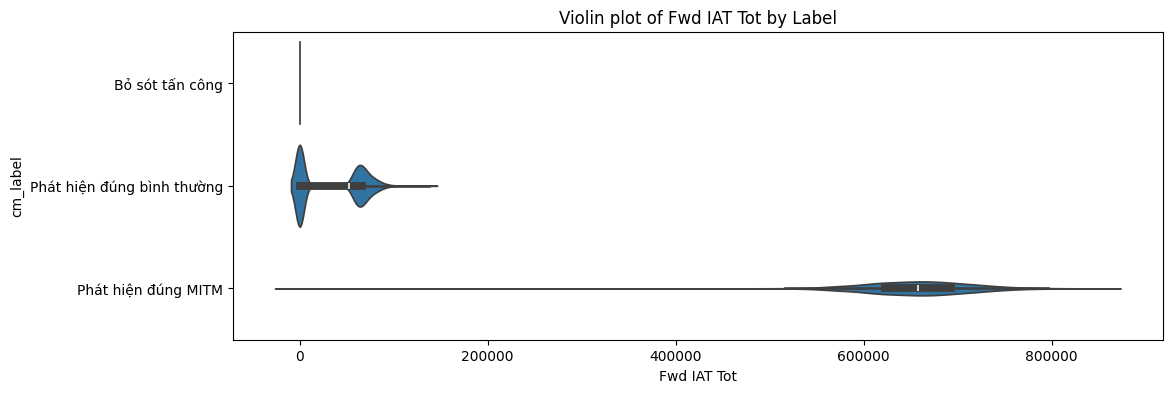

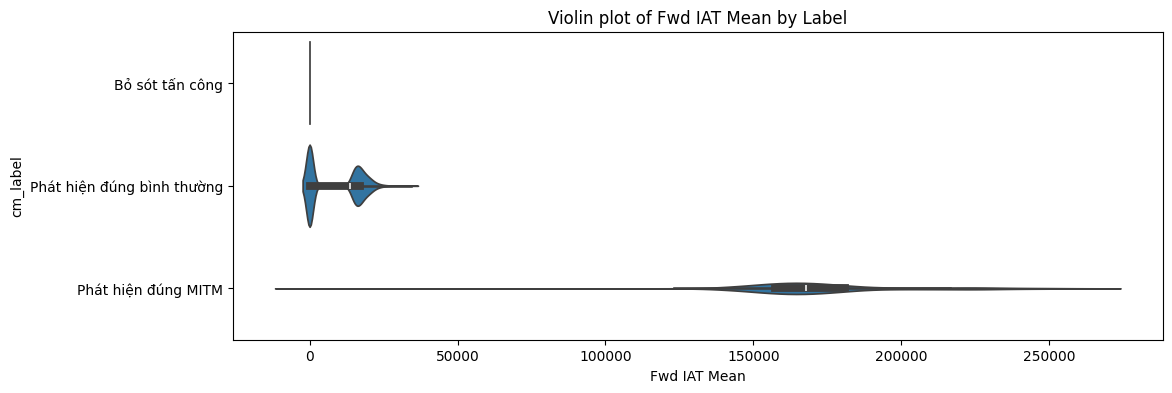

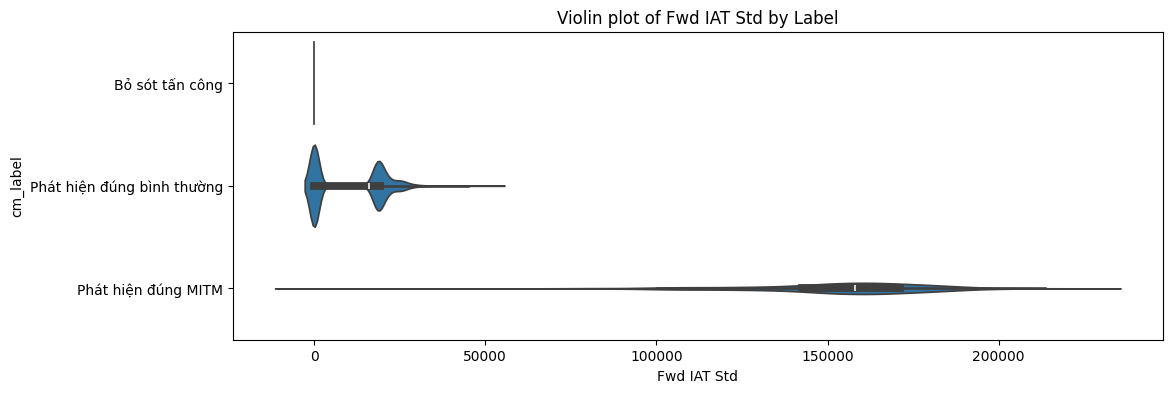

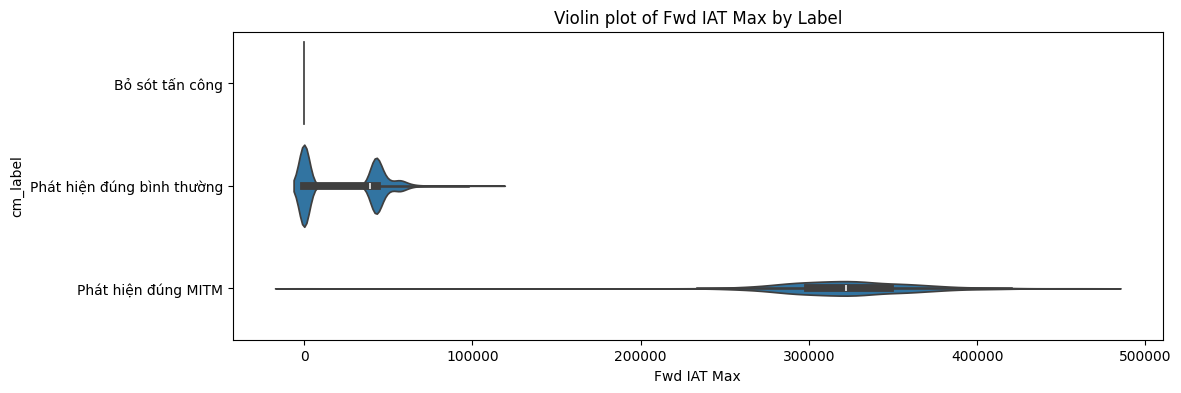

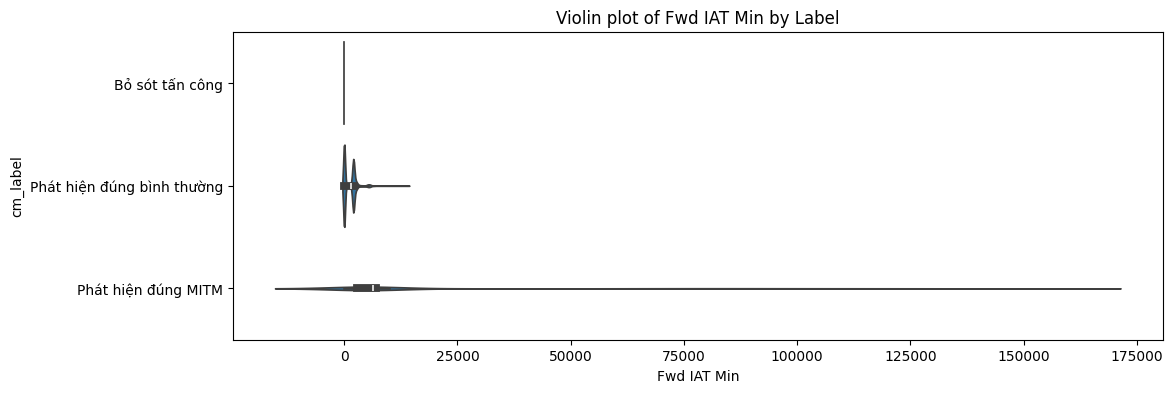

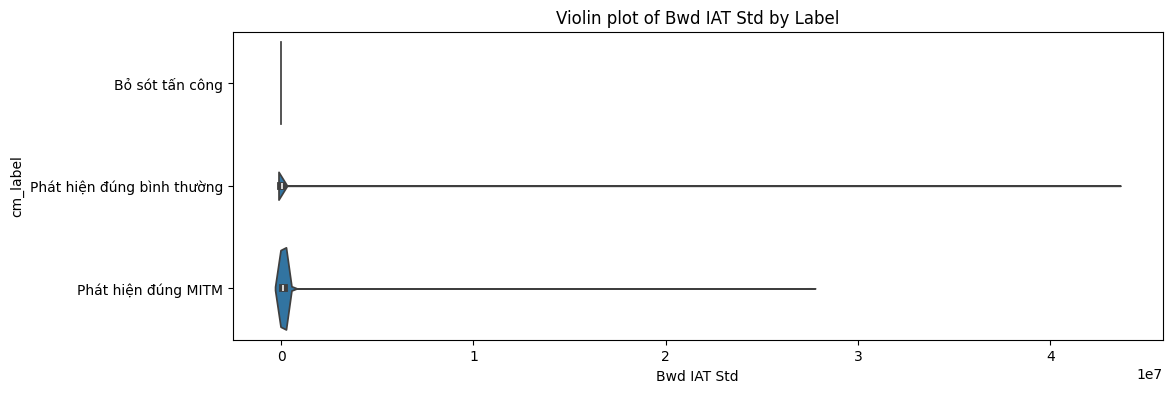

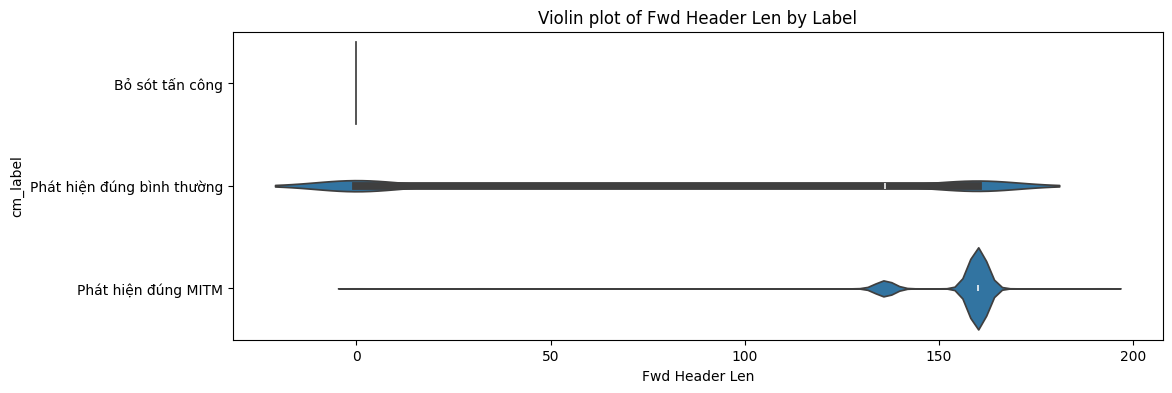

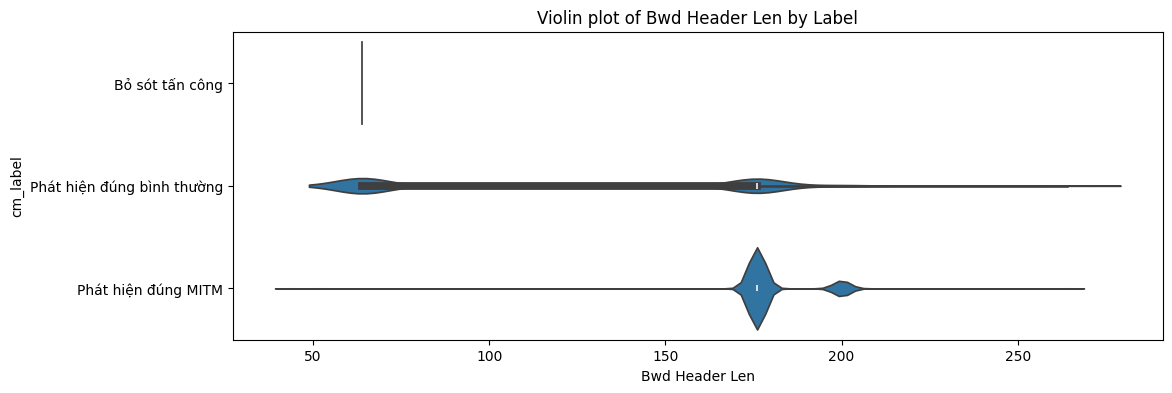

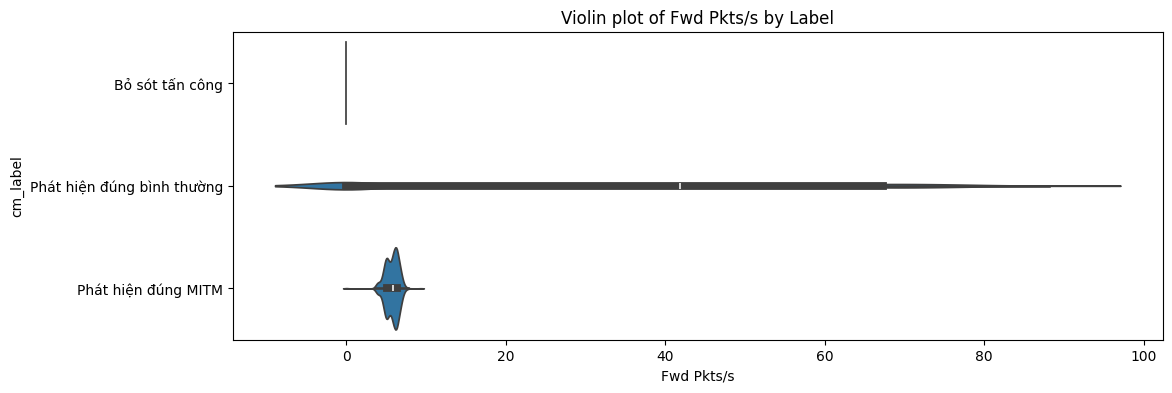

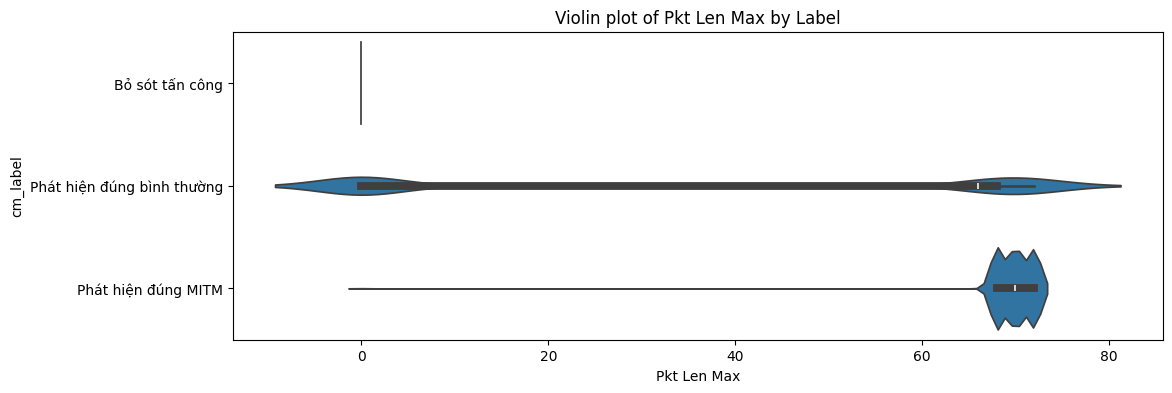

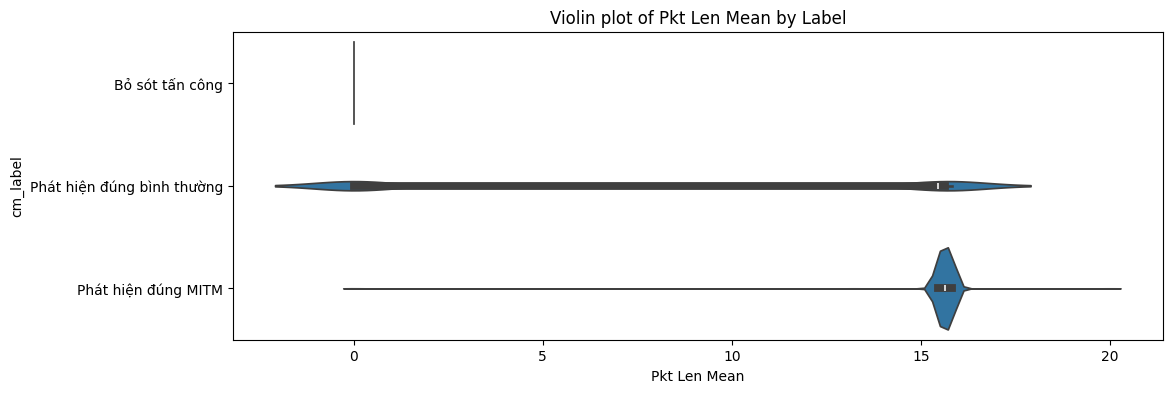

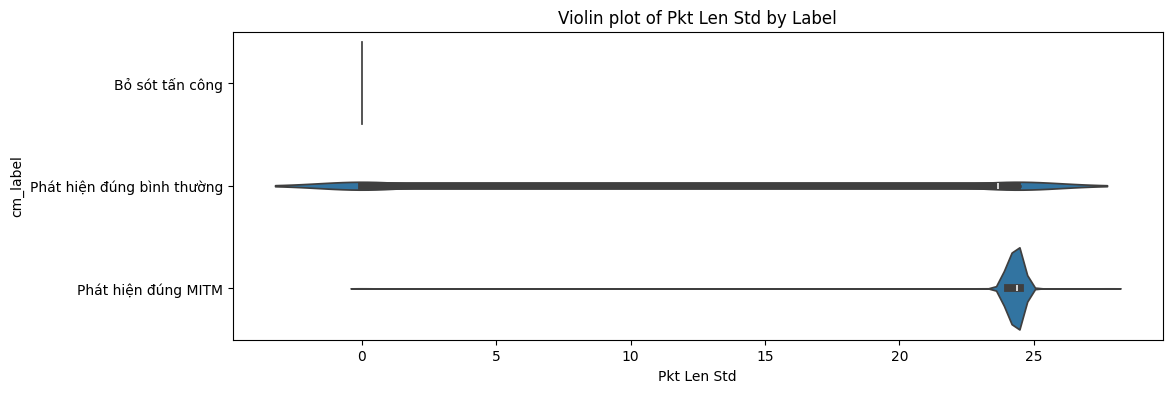

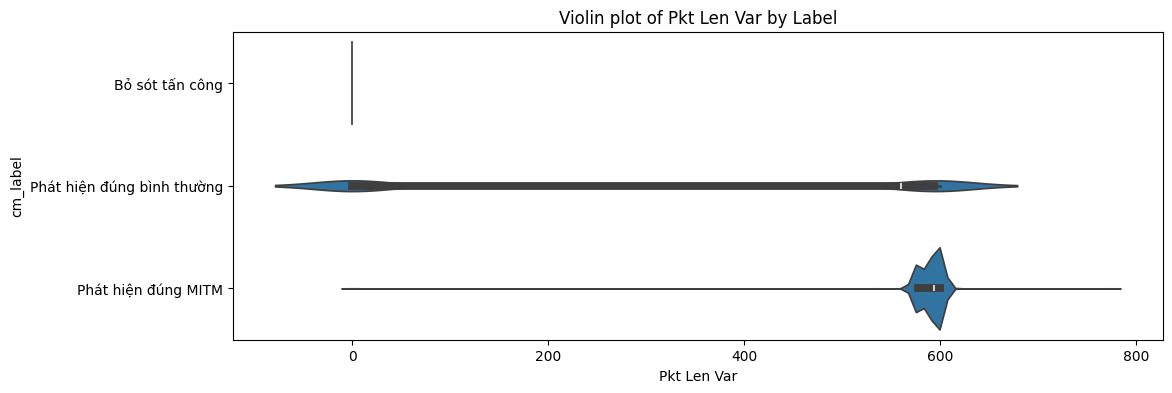

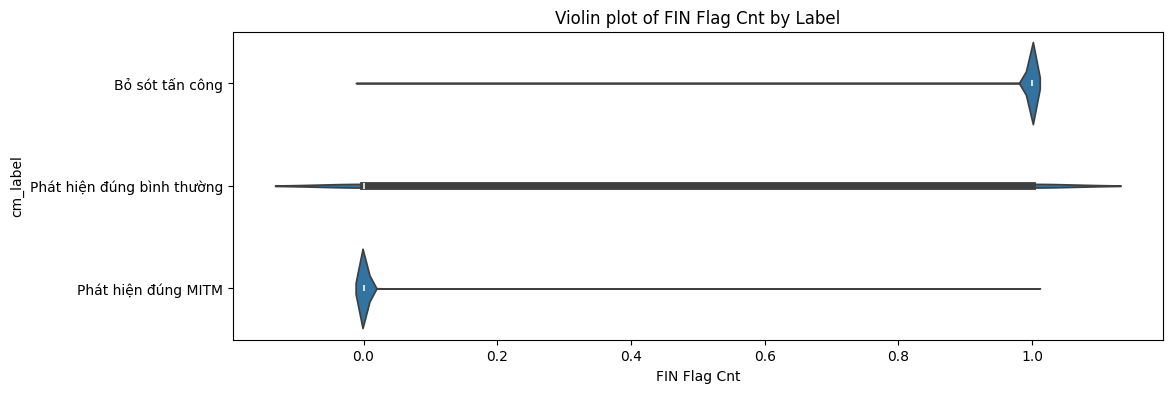

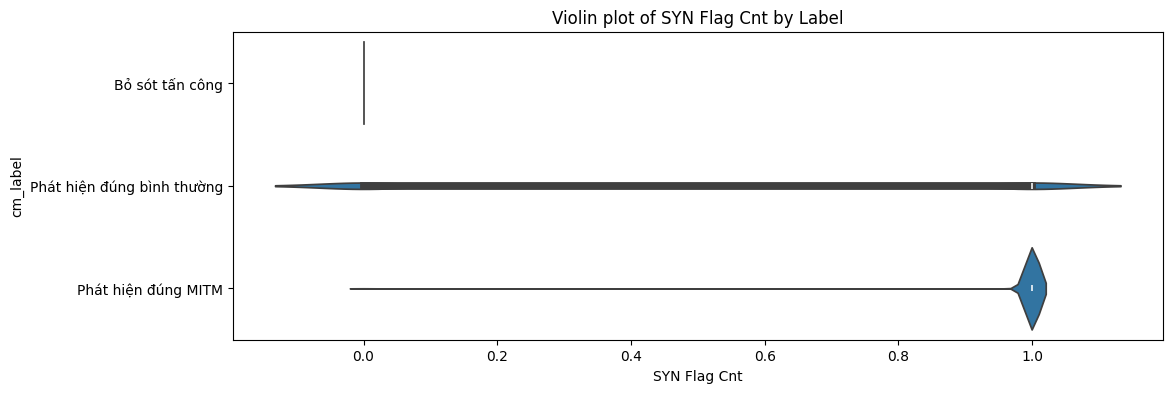

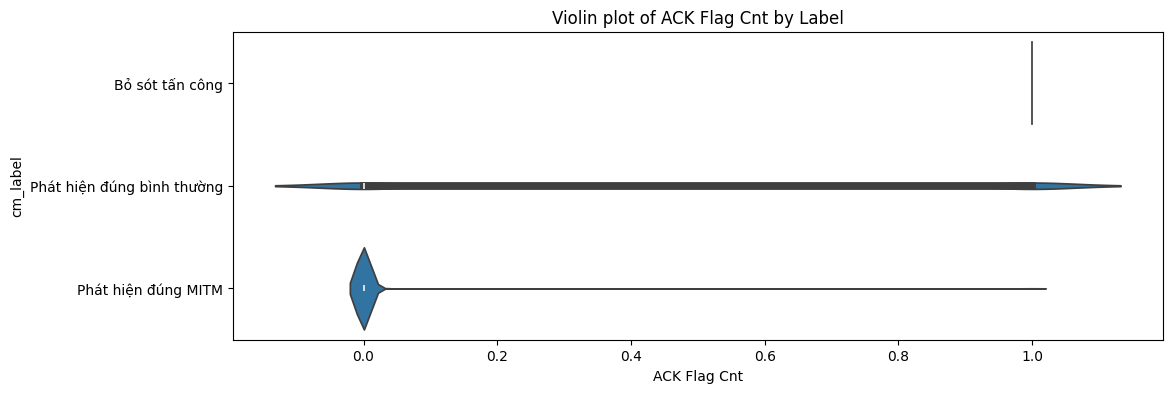

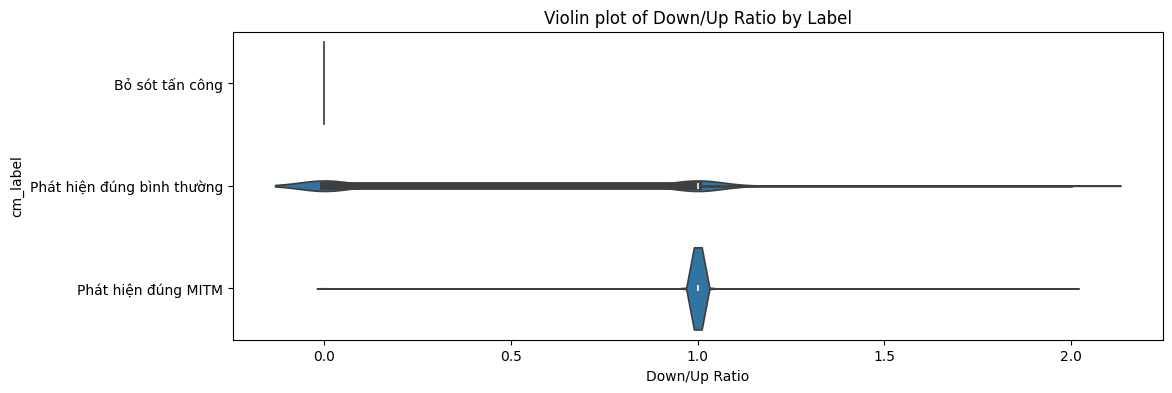

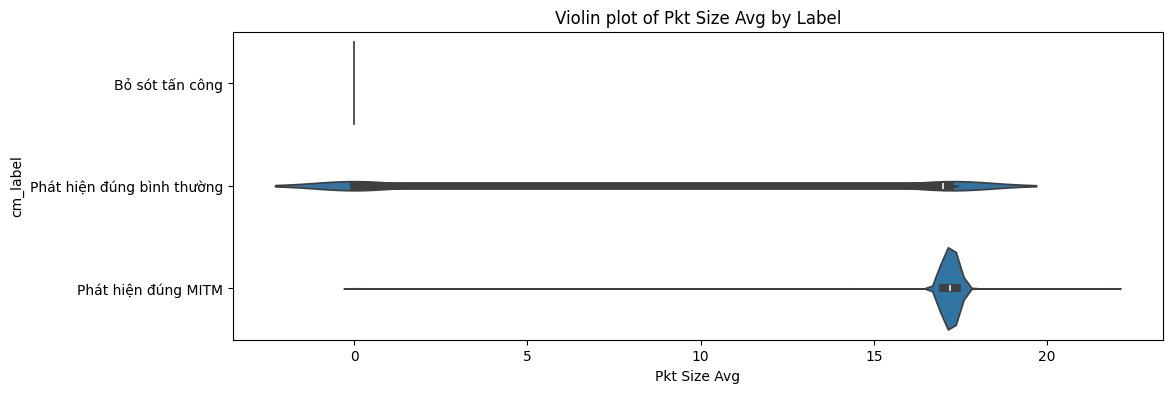

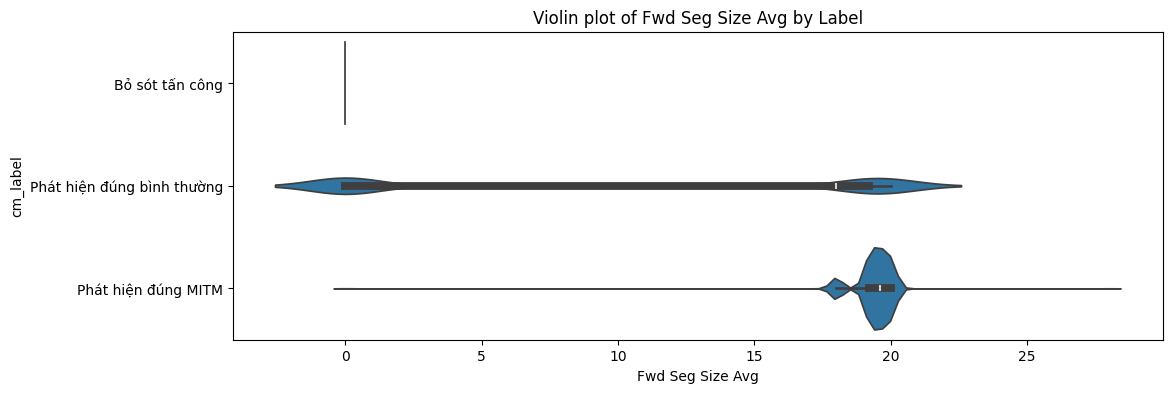

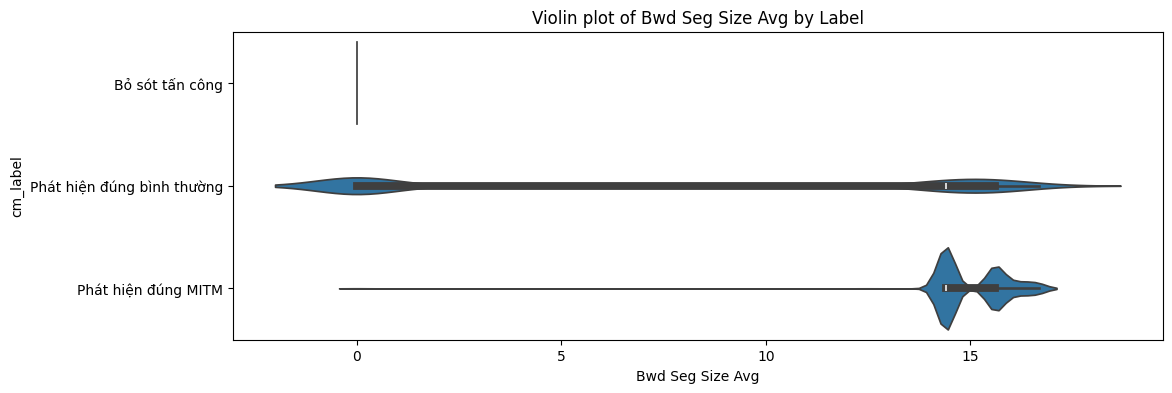

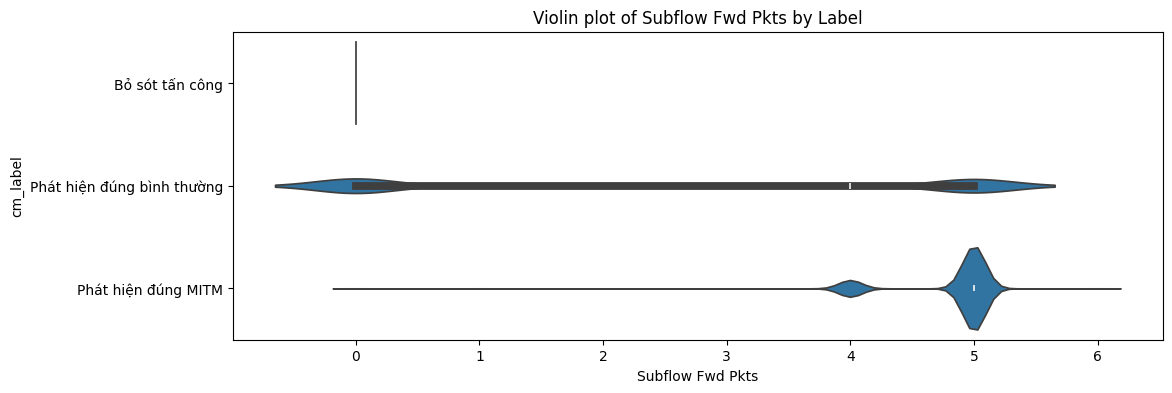

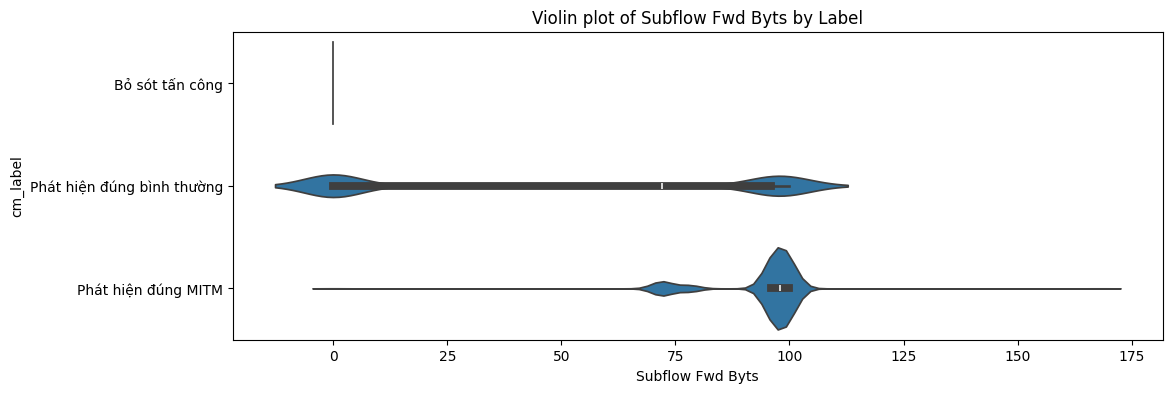

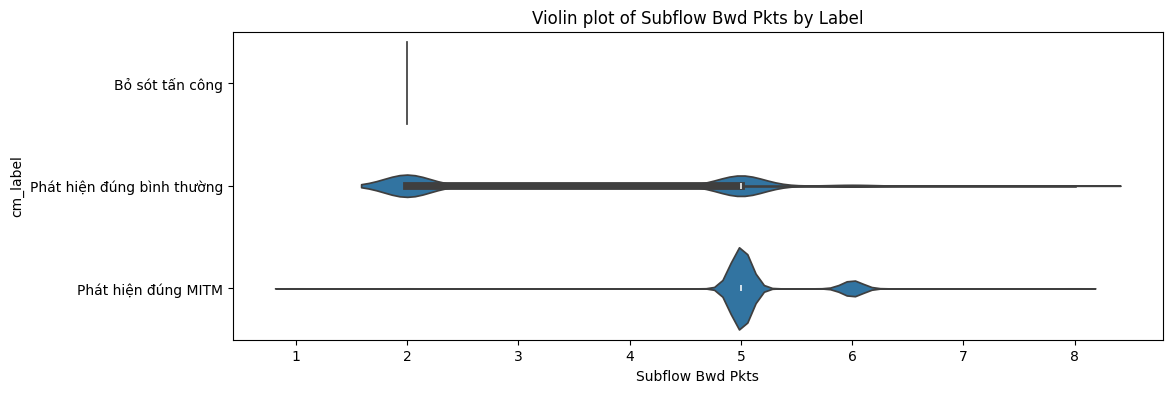

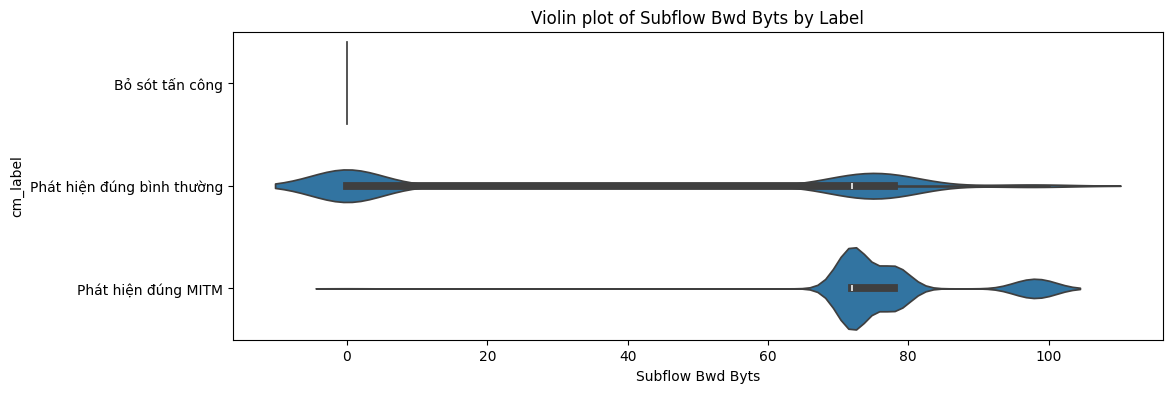

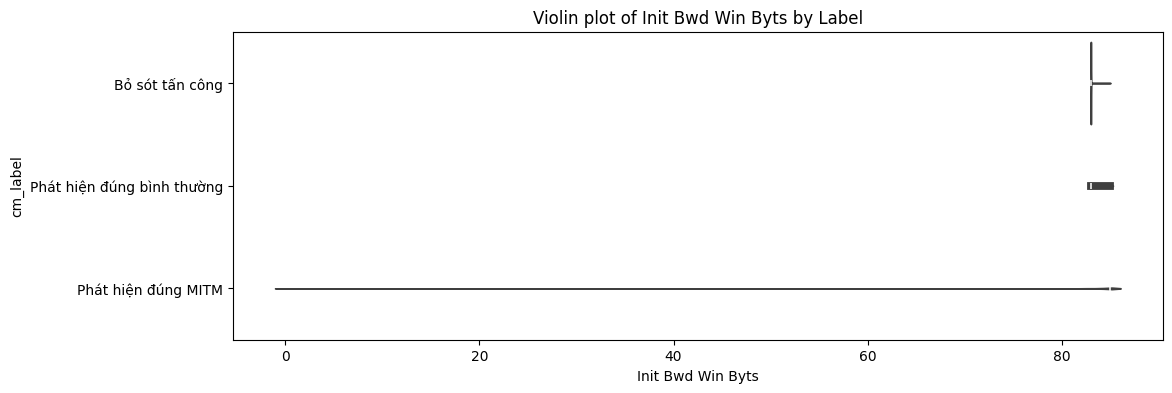

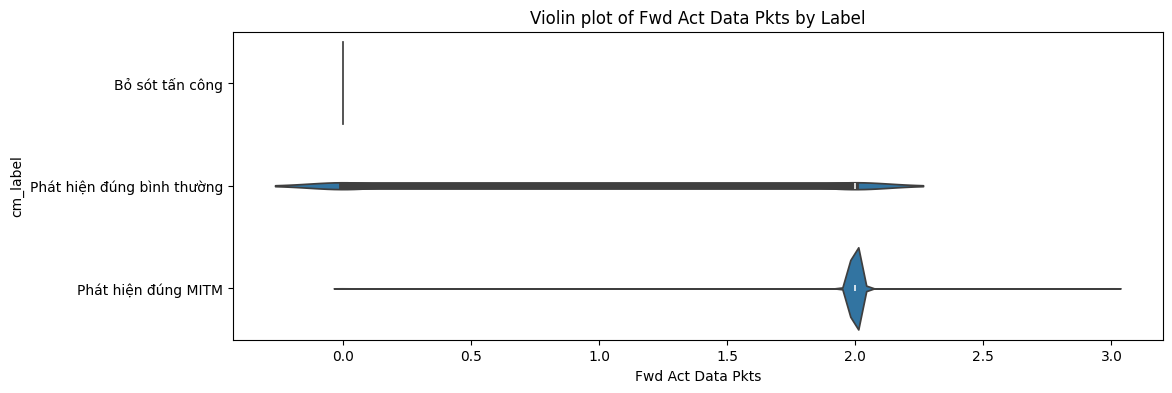

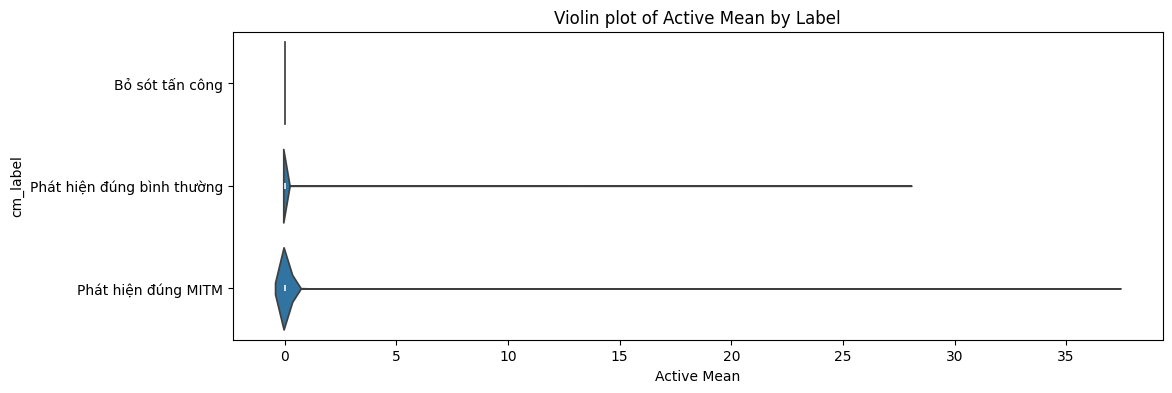

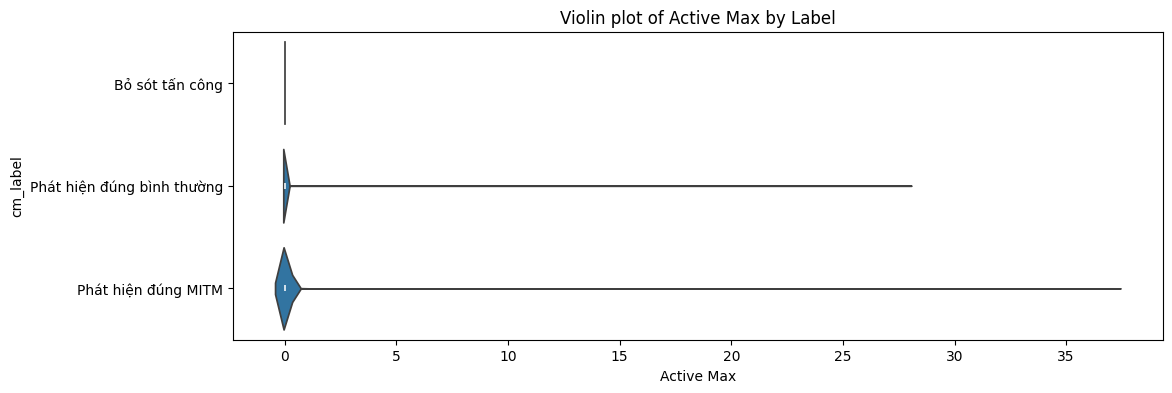

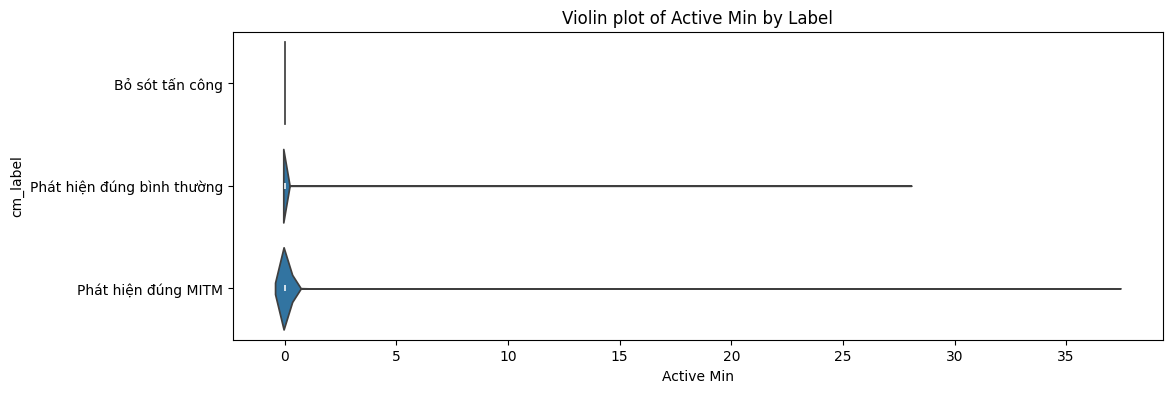

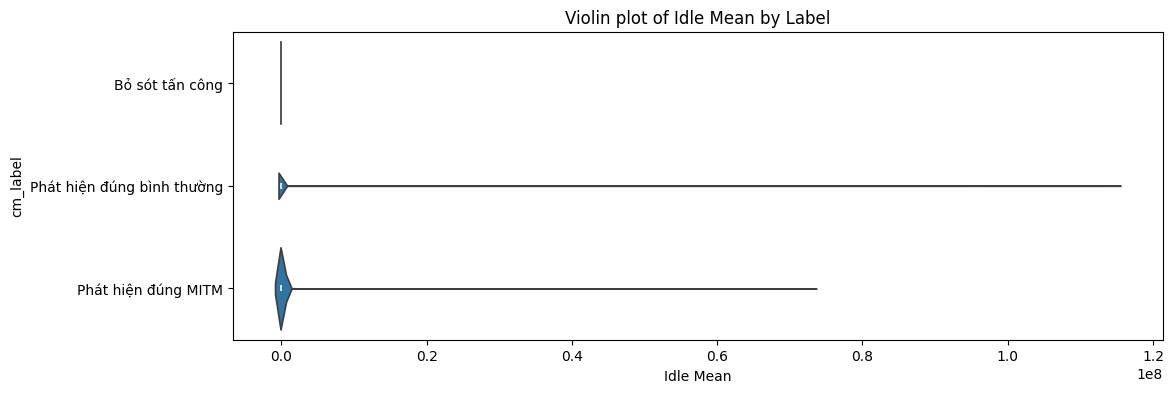

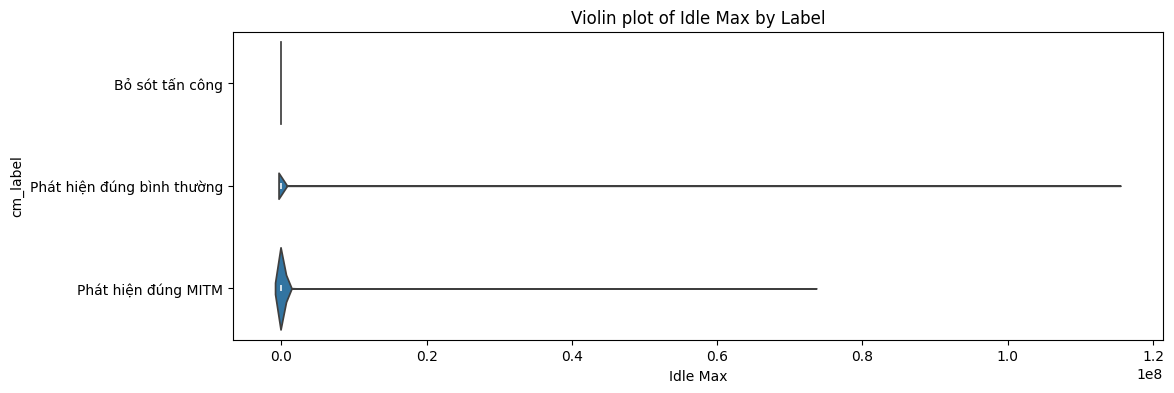

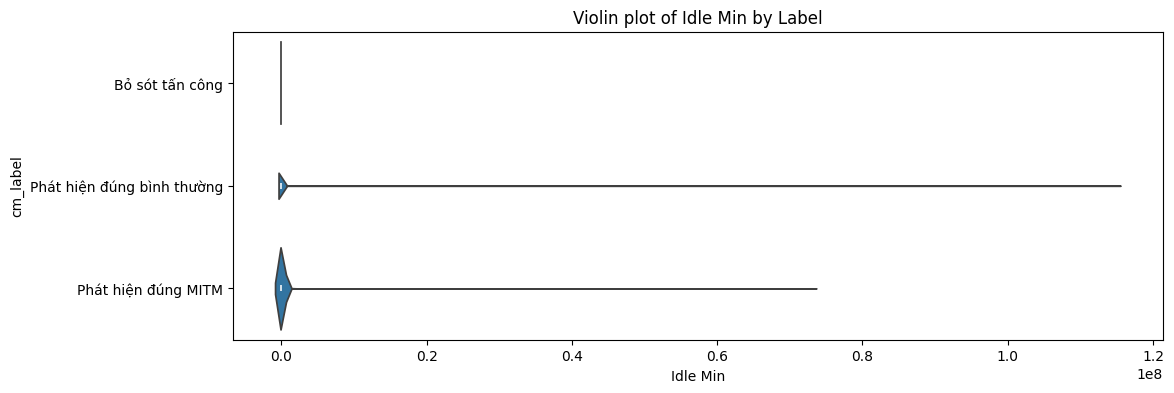

In [81]:
for col in df.select_dtypes(include='number').columns:
    plt.figure(figsize=(12, 4))
    sns.violinplot(y='cm_label', x=col, data=df)
    plt.title(f'Violin plot of {col} by Label')
    plt.show()

In [82]:
df.groupby('cm_label').describe()

Tot Fwd Pkts                                     \
                                  count      mean       std  min  25%  50%   
cm_label                                                                     
Bỏ sót tấn công                  1586.0  0.000000  0.000000  0.0  0.0  0.0   
Phát hiện đúng MITM              1531.0  4.831483  0.403030  0.0  5.0  5.0   
Phát hiện đúng bình thường      24669.0  2.468442  2.467337  0.0  0.0  4.0   

                                     Tot Bwd Pkts                           \
                            75%  max        count      mean       std  min   
cm_label                                                                     
Bỏ sót tấn công             0.0  0.0       1586.0  2.000000  0.000000  2.0   
Phát hiện đúng MITM         5.0  6.0       1531.0  5.160026  0.399177  1.0   
Phát hiện đúng bình thường  5.0  5.0      24669.0  3.546111  1.553213  2.0   

                                               TotLen Fwd Pkts             \
                            25%  50%  75%  max           count       mean   
cm_label                                                                    
Bỏ sót tấn công             2.0  2.0  2.0  2.0          1586.0   0.000000   
Phát hiện đúng MITM         5.0  5.0  5.0  8.0          1531.0  93.943828   
Phát hiện đúng bình thường  2.0  5.0  5.0  8.0         24669.0  48.163606   

                                                                      \
                                  std  min   25%   50%    75%    max   
cm_label                                                               
Bỏ sót tấn công              0.000000  0.0   0.0   0.0    0.0    0.0   
Phát hiện đúng MITM          9.885593  0.0  96.0  98.0  100.0  168.0   
Phát hiện đúng bình thường  48.213545  0.0   0.0  72.0   96.0  100.0   

                           TotLen Bwd Pkts                                   \
                                     count       mean        std  min   25%   
cm_label                                                                      
Bỏ sót tấn công                     1586.0   0.000000   0.000000  0.0   0.0   
Phát hiện đúng MITM                 1531.0  77.882430   9.681288  0.0  72.0   
Phát hiện đúng bình thường         24669.0  38.567271  38.732359  0.0   0.0   

                                              Fwd Pkt Len Max             \
                             50%   75%    max           count       mean   
cm_label                                                                   
Bỏ sót tấn công              0.0   0.0    0.0          1586.0   0.000000   
Phát hiện đúng MITM         72.0  78.0  100.0          1531.0  65.934683   
Phát hiện đúng bình thường  72.0  78.0  100.0         24669.0  34.114232   

                                                                    \
                                  std  min   25%   50%   75%   max   
cm_label                                                             
Bỏ sót tấn công              0.000000  0.0   0.0   0.0   0.0   0.0   
Phát hiện đúng MITM          9.396755  0.0  68.0  70.0  72.0  72.0   
Phát hiện đúng bình thường  34.302654  0.0   0.0  44.0  68.0  72.0   

                           Fwd Pkt Len Mean                                  \
                                      count       mean       std  min   25%   
cm_label                                                                      
Bỏ sót tấn công                      1586.0   0.000000  0.000000  0.0   0.0   
Phát hiện đúng MITM                  1531.0  19.388439  0.937618  0.0  19.2   
Phát hiện đúng bình thường          24669.0   9.784633  9.756244  0.0   0.0   

                                             Fwd Pkt Len Std             \
                             50%   75%   max           count       mean   
cm_label                                                                  
Bỏ sót tấn công              0.0   0.0   0.0          1586.0   0.000000   
Phát hiện đúng MITM         19.6  20.0  28.0          1531.0  29.

In [83]:
# Step 1: Select target rows
target_labels = ["Báo nhầm là MITM", "Bỏ sót tấn công"]
target_df = df[df["cm_label"].isin(target_labels)]

# Step 2: Get feature columns (exclude 'cm_label')
feature_cols = [col for col in df.columns if col != "cm_label"]

# Step 3: Find constant columns (min == max)
constant_cols = [
    col for col in feature_cols
    if target_df[col].nunique() == 1
]

# Step 4: Keep only constant columns + cm_label
df_constant = df[constant_cols + ["cm_label"]]

print("Kept constant columns:", constant_cols)


Kept constant columns: ['Tot Fwd Pkts', 'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std', 'Bwd Pkt Len Max', 'Bwd Pkt Len Mean', 'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow IAT Std', 'Fwd IAT Tot', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Std', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s', 'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Std', 'Pkt Len Var', 'SYN Flag Cnt', 'ACK Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'Subflow Fwd Pkts', 'Subflow Fwd Byts', 'Subflow Bwd Pkts', 'Subflow Bwd Byts', 'Fwd Act Data Pkts', 'Active Mean', 'Active Max', 'Active Min', 'Idle Mean', 'Idle Max', 'Idle Min']


In [84]:
df_constant.groupby('cm_label').describe()

Tot Fwd Pkts                                     \
                                  count      mean       std  min  25%  50%   
cm_label                                                                     
Bỏ sót tấn công                  1586.0  0.000000  0.000000  0.0  0.0  0.0   
Phát hiện đúng MITM              1531.0  4.831483  0.403030  0.0  5.0  5.0   
Phát hiện đúng bình thường      24669.0  2.468442  2.467337  0.0  0.0  4.0   

                                     Tot Bwd Pkts                           \
                            75%  max        count      mean       std  min   
cm_label                                                                     
Bỏ sót tấn công             0.0  0.0       1586.0  2.000000  0.000000  2.0   
Phát hiện đúng MITM         5.0  6.0       1531.0  5.160026  0.399177  1.0   
Phát hiện đúng bình thường  5.0  5.0      24669.0  3.546111  1.553213  2.0   

                                               TotLen Fwd Pkts             \
                            25%  50%  75%  max           count       mean   
cm_label                                                                    
Bỏ sót tấn công             2.0  2.0  2.0  2.0          1586.0   0.000000   
Phát hiện đúng MITM         5.0  5.0  5.0  8.0          1531.0  93.943828   
Phát hiện đúng bình thường  2.0  5.0  5.0  8.0         24669.0  48.163606   

                                                                      \
                                  std  min   25%   50%    75%    max   
cm_label                                                               
Bỏ sót tấn công              0.000000  0.0   0.0   0.0    0.0    0.0   
Phát hiện đúng MITM          9.885593  0.0  96.0  98.0  100.0  168.0   
Phát hiện đúng bình thường  48.213545  0.0   0.0  72.0   96.0  100.0   

                           TotLen Bwd Pkts                                   \
                                     count       mean        std  min   25%   
cm_label                                                                      
Bỏ sót tấn công                     1586.0   0.000000   0.000000  0.0   0.0   
Phát hiện đúng MITM                 1531.0  77.882430   9.681288  0.0  72.0   
Phát hiện đúng bình thường         24669.0  38.567271  38.732359  0.0   0.0   

                                              Fwd Pkt Len Max             \
                             50%   75%    max           count       mean   
cm_label                                                                   
Bỏ sót tấn công              0.0   0.0    0.0          1586.0   0.000000   
Phát hiện đúng MITM         72.0  78.0  100.0          1531.0  65.934683   
Phát hiện đúng bình thường  72.0  78.0  100.0         24669.0  34.114232   

                                                                    \
                                  std  min   25%   50%   75%   max   
cm_label                                                             
Bỏ sót tấn công              0.000000  0.0   0.0   0.0   0.0   0.0   
Phát hiện đúng MITM          9.396755  0.0  68.0  70.0  72.0  72.0   
Phát hiện đúng bình thường  34.302654  0.0   0.0  44.0  68.0  72.0   

                           Fwd Pkt Len Mean                                  \
                                      count       mean       std  min   25%   
cm_label                                                                      
Bỏ sót tấn công                      1586.0   0.000000  0.000000  0.0   0.0   
Phát hiện đúng MITM                  1531.0  19.388439  0.937618  0.0  19.2   
Phát hiện đúng bình thường          24669.0   9.784633  9.756244  0.0   0.0   

                                             Fwd Pkt Len Std             \
                             50%   75%   max           count       mean   
cm_label                                                                  
Bỏ sót tấn công              0.0   0.0   0.0          1586.0   0.000000   
Phát hiện đúng MITM         19.6  20.0  28.0          1531.0  29.

In [85]:
# Step 1: Get feature columns (exclude 'cm_label' if you want to preserve labels)
feature_cols = [col for col in df_constant.columns if col != 'cm_label']

# Step 2: Identify columns with a single unique value across all rows
constant_cols_global = [
    col for col in feature_cols
    if df_constant[col].nunique() == 1
]

# Step 3: Drop those columns from the DataFrame
df_cleaned = df_constant.drop(columns=constant_cols_global)

# Optional: Print dropped columns
print("Dropped globally constant columns:", constant_cols_global)


Dropped globally constant columns: []


In [86]:
df_cleaned.groupby('cm_label').describe()

Tot Fwd Pkts                                     \
                                  count      mean       std  min  25%  50%   
cm_label                                                                     
Bỏ sót tấn công                  1586.0  0.000000  0.000000  0.0  0.0  0.0   
Phát hiện đúng MITM              1531.0  4.831483  0.403030  0.0  5.0  5.0   
Phát hiện đúng bình thường      24669.0  2.468442  2.467337  0.0  0.0  4.0   

                                     Tot Bwd Pkts                           \
                            75%  max        count      mean       std  min   
cm_label                                                                     
Bỏ sót tấn công             0.0  0.0       1586.0  2.000000  0.000000  2.0   
Phát hiện đúng MITM         5.0  6.0       1531.0  5.160026  0.399177  1.0   
Phát hiện đúng bình thường  5.0  5.0      24669.0  3.546111  1.553213  2.0   

                                               TotLen Fwd Pkts             \
                            25%  50%  75%  max           count       mean   
cm_label                                                                    
Bỏ sót tấn công             2.0  2.0  2.0  2.0          1586.0   0.000000   
Phát hiện đúng MITM         5.0  5.0  5.0  8.0          1531.0  93.943828   
Phát hiện đúng bình thường  2.0  5.0  5.0  8.0         24669.0  48.163606   

                                                                      \
                                  std  min   25%   50%    75%    max   
cm_label                                                               
Bỏ sót tấn công              0.000000  0.0   0.0   0.0    0.0    0.0   
Phát hiện đúng MITM          9.885593  0.0  96.0  98.0  100.0  168.0   
Phát hiện đúng bình thường  48.213545  0.0   0.0  72.0   96.0  100.0   

                           TotLen Bwd Pkts                                   \
                                     count       mean        std  min   25%   
cm_label                                                                      
Bỏ sót tấn công                     1586.0   0.000000   0.000000  0.0   0.0   
Phát hiện đúng MITM                 1531.0  77.882430   9.681288  0.0  72.0   
Phát hiện đúng bình thường         24669.0  38.567271  38.732359  0.0   0.0   

                                              Fwd Pkt Len Max             \
                             50%   75%    max           count       mean   
cm_label                                                                   
Bỏ sót tấn công              0.0   0.0    0.0          1586.0   0.000000   
Phát hiện đúng MITM         72.0  78.0  100.0          1531.0  65.934683   
Phát hiện đúng bình thường  72.0  78.0  100.0         24669.0  34.114232   

                                                                    \
                                  std  min   25%   50%   75%   max   
cm_label                                                             
Bỏ sót tấn công              0.000000  0.0   0.0   0.0   0.0   0.0   
Phát hiện đúng MITM          9.396755  0.0  68.0  70.0  72.0  72.0   
Phát hiện đúng bình thường  34.302654  0.0   0.0  44.0  68.0  72.0   

                           Fwd Pkt Len Mean                                  \
                                      count       mean       std  min   25%   
cm_label                                                                      
Bỏ sót tấn công                      1586.0   0.000000  0.000000  0.0   0.0   
Phát hiện đúng MITM                  1531.0  19.388439  0.937618  0.0  19.2   
Phát hiện đúng bình thường          24669.0   9.784633  9.756244  0.0   0.0   

                                             Fwd Pkt Len Std             \
                             50%   75%   max           count       mean   
cm_label                                                                  
Bỏ sót tấn công              0.0   0.0   0.0          1586.0   0.000000   
Phát hiện đúng MITM         19.6  20.0  28.0          1531.0  29.

In [87]:
df_cleaned.columns

Index(['Tot Fwd Pkts', 'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts',
       'Fwd Pkt Len Max', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Mean', 'Bwd Pkt Len Std', 'Flow Byts/s',
       'Flow IAT Std', 'Fwd IAT Tot', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Std', 'Fwd Header Len',
       'Bwd Header Len', 'Fwd Pkts/s', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'SYN Flag Cnt', 'ACK Flag Cnt',
       'Down/Up Ratio', 'Pkt Size Avg', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg',
       'Subflow Fwd Pkts', 'Subflow Fwd Byts', 'Subflow Bwd Pkts',
       'Subflow Bwd Byts', 'Fwd Act Data Pkts', 'Active Mean', 'Active Max',
       'Active Min', 'Idle Mean', 'Idle Max', 'Idle Min', 'cm_label'],
      dtype='object')